In [1]:
import numpy as np
import pandas as pd
import os


import matplotlib.pyplot as plt
import seaborn as sb
color = sb.color_palette()
import matplotlib as mpl

%matplotlib inline

from sklearn import preprocessing as pp 
#import the entire linear model
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr 
from sklearn.decomposition import PCA


In [2]:
#Read the new excel file, this contains the individual answers.
#Read Excel data provided. Read the first tab.
current_path = os.getcwd()
file = '/datasets/ActivatedInsights/EmployeeData_May_2018_Results.xlsx'
data1 = pd.read_excel(current_path + file, sheet_name = 1)

In [3]:
data1.head()

RespondentId  1  2  3  4  5  6  7  8  9  ...  Location Code  \
0        182227  4  5  5  4  4  5  5  3  5  ...           1075   
1        182658  5  5  5  5  5  5  5  5  5  ...           5504   
2        182740  5  5  5  4  4  5  4  5  5  ...           5504   
3        182750  5  5  5  5  5  5  5  5  5  ...           5504   
4        182755  5  5  5  5  5  5  5  5  5  ...           5504   

                  Managerial Level  Marital Status  \
0  Employee/Individual Contributor         Married   
1  Frontline manager or supervisor         Married   
2  Employee/Individual Contributor          Single   
3  Frontline manager or supervisor   Not Indicated   
4  Frontline manager or supervisor          Single   

   Meaningful Innovation Opportunities  Pay Type (Hourly/Salaried)  \
0                                A lot                      Hourly   
1                                A lot                    Salaried   
2                                A lot                      Hourly   
3                                A lot                      Hourly   
4                                A lot                      Hourly   

      Race/ Ethnicity               Responsibility        Tenure-GPTW  \
0  Caucasian or White  Neither children nor elders  Less than 2 years   
1  Caucasian or White                     Children  Less than 2 years   
2  Caucasian or White     Both children and elders  Less than 2 years   
3  Caucasian or White     Both children and elders      Over 20 years   
4  Caucasian or White                       Elders  Less than 2 years   

      Tenure-SeniorCare  Zip within the area  
0  6 months to 9 months                32789  
1  3 months to 6 months                80107  
2    9 months to 1 year                80107  
3         Over 20 years                80107  
4     1 year to 2 years                80107  

[5 rows x 81 columns]

In [4]:
data1.rename(columns = {'Location Code':'LocationCode'}, inplace = True) 

In [5]:
TestLocationCodes=data1.LocationCode.unique()
TestLocationCodes

array([1075, 5504, 5573, 5563, 5581, 5718, 5676, 5529, 5643, 5077, 5513,
       5648, 5493, 6401, 5669, 5655, 5678, 5705, 5671, 5717, 5709, 5620,
       5417, 5199, 5704, 5586, 5520, 5126, 5482, 5484, 5310, 5530, 5710,
       5711, 5553, 5280, 5024, 5477, 5683, 1076, 5501, 5514, 5906, 5056,
       5269, 5680, 5708, 6501, 5537, 5907, 5331, 5475, 5623, 5370, 5649,
       5568, 5646, 5702, 5677, 5582, 5657, 5541, 5476, 5534, 5522, 5703,
       5682, 5495, 5712, 5714, 5200, 5602, 5721, 5137, 5065, 5078, 5015,
       5301, 5606, 5524, 5713, 5516, 5681, 5550, 5658, 5560, 5478, 5546,
       5640, 5625, 5517, 5715, 5240, 5532, 5660, 5719, 5437, 5318, 5565,
       5174, 5580, 5494, 5512, 5481, 5644, 5564, 5091, 5515, 5359, 5675,
       5518, 5503, 5492, 5562, 5663, 5574, 5567, 5570, 5543, 5168, 5109,
       5549, 5361, 5020, 5673, 5674, 5647, 5684, 5372, 5311, 5585, 5716,
       5665, 5587, 5521, 5052, 5542, 5653, 5048, 5556, 5706, 5540, 5085,
       5486, 5575, 5265, 5306, 5666, 5409, 5377, 54

In [6]:
#Load the 2018 May dataset.
#Read Excel data provided. Read the first tab.
current_path = os.getcwd()
file2 = '/datasets/ActivatedInsights/ActivatedInsight.xlsx'
data2 = pd.read_excel(current_path + file2)

#First two rows are excel column names that only exists for some columns. Remove them for now.
#Also some of the last few rows have no data in most columns.
data2 = data2.iloc[2:-13]
#LocationCode will contain the column for the location code for this study use the May 2018 code
LocationCode_for_data = data2.iloc[:,0]

In [7]:
Answers=data1.iloc[:,1:61]

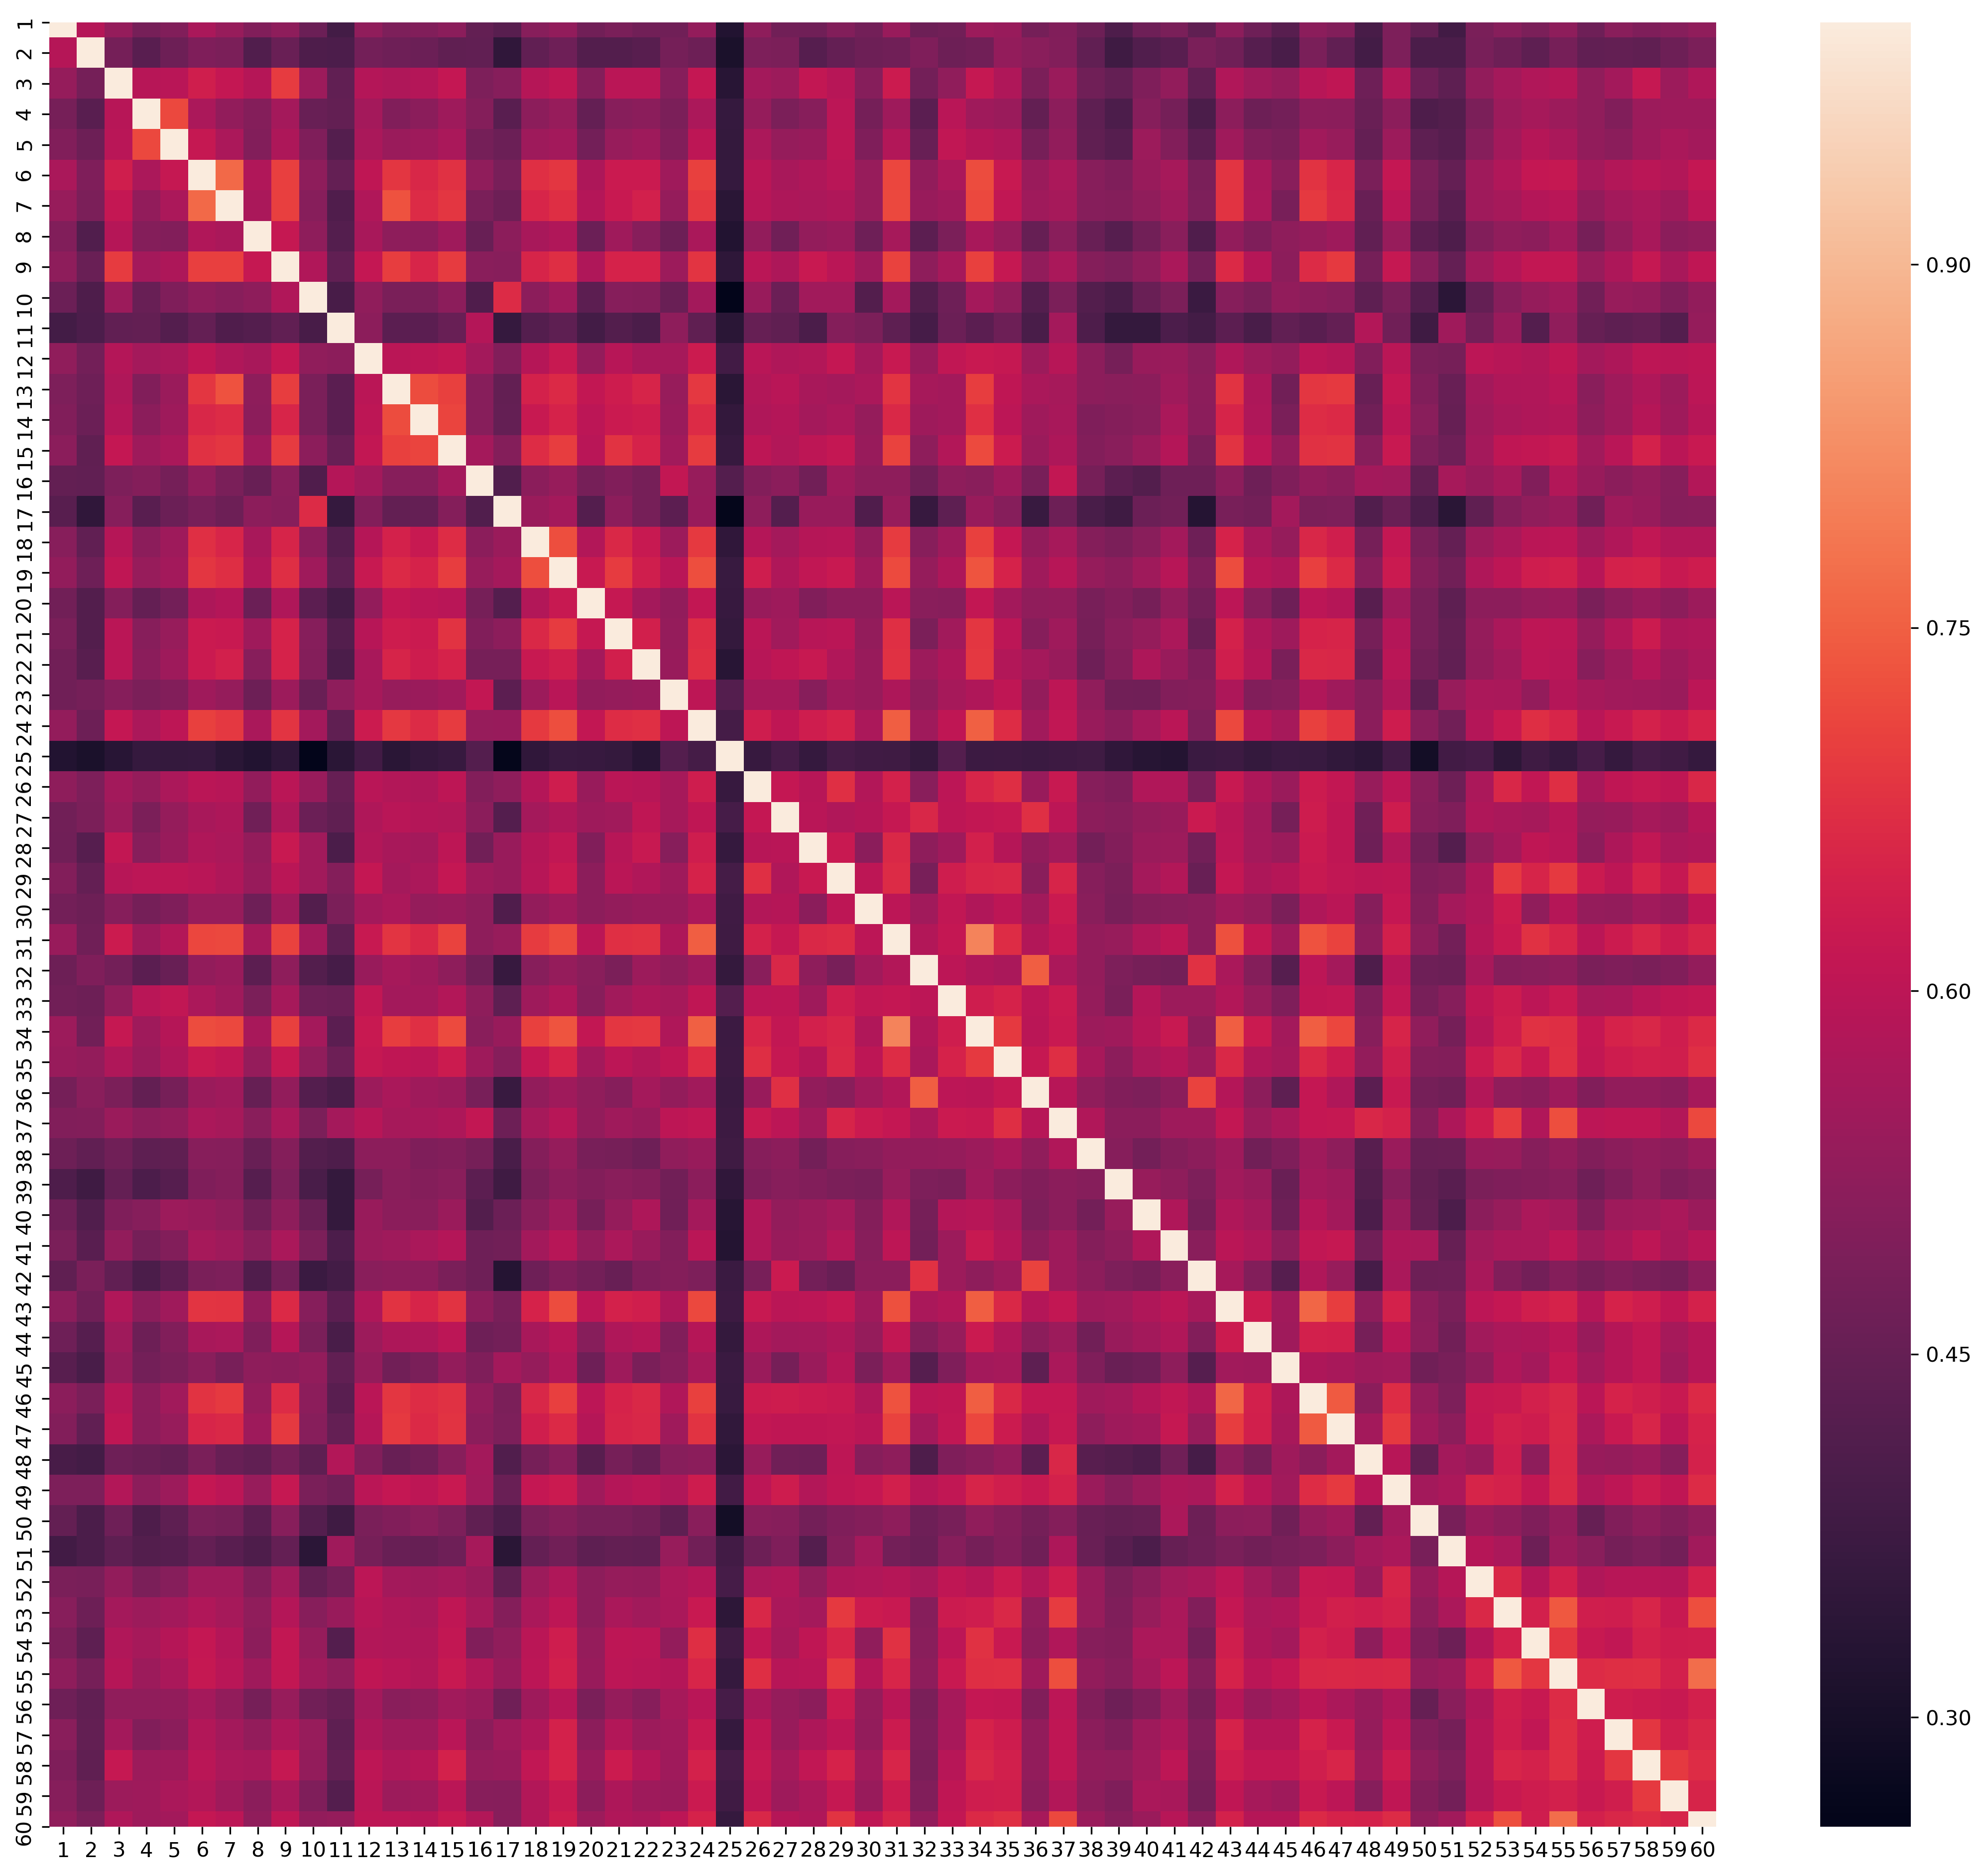

In [8]:
#Make a correlation matrix to see which questions are correlated.
fig=plt.figure(figsize=(18, 16), dpi= 300)
corrMatrix = Answers.corr()
sb.heatmap(corrMatrix)

In [9]:
corrMatrix.describe()

1          2          3          4          5          6   \
count  60.000000  60.000000  60.000000  60.000000  60.000000  60.000000   
mean    0.494031   0.460297   0.556010   0.513747   0.533957   0.591781   
std     0.080981   0.083259   0.086057   0.087120   0.086419   0.094006   
min     0.323308   0.308659   0.335123   0.360719   0.358629   0.360442   
25%     0.466616   0.425563   0.507491   0.472120   0.491970   0.538272   
50%     0.492025   0.461463   0.557452   0.514288   0.539484   0.579079   
75%     0.519299   0.480354   0.592882   0.545395   0.568115   0.629722   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

              7          8          9          10  ...         51         52  \
count  60.000000  60.000000  60.000000  60.000000  ...  60.000000  60.000000   
mean    0.580972   0.514324   0.590838   0.494440  ...   0.481847   0.563900   
std     0.100054   0.083909   0.094785   0.093114  ...   0.087627   0.077706   
min     0.338237   0.324326   0.347007   0.254797  ...   0.337452   0.391956   
25%     0.525789   0.468833   0.526482   0.453619  ...   0.444435   0.529120   
50%     0.570129   0.519387   0.581997   0.499687  ...   0.470701   0.561128   
75%     0.628573   0.548120   0.651235   0.528618  ...   0.504684   0.589776   
max     1.000000   1.000000   1.000000   1.000000  ...   1.000000   1.000000   

              53         54         55         56         57         58  \
count  60.000000  60.000000  60.000000  60.000000  60.000000  60.000000   
mean    0.590090   0.580209   0.609596   0.551103   0.573004   0.591433   
std     0.085902   0.085894   0.086512   0.082693   0.083666   0.083975   
min     0.342787   0.378553   0.359758   0.392628   0.360340   0.388752   
25%     0.542994   0.524622   0.549471   0.506123   0.528021   0.542387   
50%     0.573119   0.584069   0.598789   0.539135   0.572594   0.599394   
75%     0.633933   0.620130   0.657794   0.592665   0.612257   0.639375   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

              59         60  
count  60.000000  60.000000  
mean    0.569461   0.604381  
std     0.081928   0.084540  
min     0.381490   0.359612  
25%     0.517492   0.551545  
50%     0.567009   0.598868  
75%     0.609222   0.649033  
max     1.000000   1.000000  

[8 rows x 60 columns]

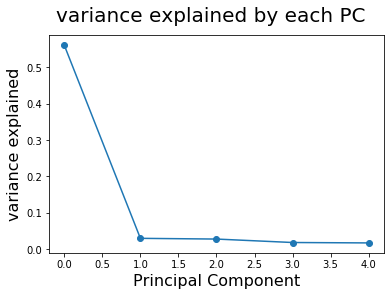

In [10]:
#Run PCA to reduce the features to the top 10 or so.
#Chose 10 components for now because we know this should be enough for this dataset
pcaA=PCA(n_components=5)
pcaA.fit(Answers)

#check the variance explained.
#print(pca.explained_variance_ratio_)
plt.plot(pcaA.explained_variance_ratio_,'o-')
plt.suptitle('variance explained by each PC', fontsize = 20)
plt.ylabel('variance explained', fontsize = 16)
plt.xlabel('Principal Component', fontsize=16)
plt.show()

#trasform the Data
DataArrayPCA_answers=pcaA.transform(Answers)

In [11]:
DataArrayPCA_answers_df=pd.DataFrame(data=DataArrayPCA_answers)

#
location_variance = np.zeros((LocationCode_for_data.shape[0],1))

#Get the data for each location, calculate the variance of PC1 for that location.
for index in range(LocationCode_for_data.shape[0]):
    TestLocationData=DataArrayPCA_answers_df.loc[data1['LocationCode'] == LocationCode_for_data.iloc[index],0]
    #calculate the variance for that location
    location_variance[index] = TestLocationData.var()
location_variance = pd.DataFrame(data=location_variance)

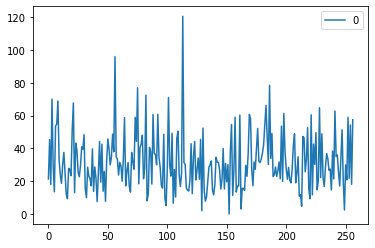

In [12]:
sb.lineplot(data=location_variance)

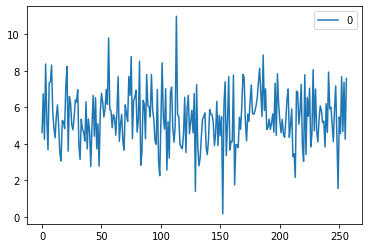

In [13]:
location_sd=np.sqrt(location_variance)
sb.lineplot(data=location_sd)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82ef2519b0>]],
      dtype=object)

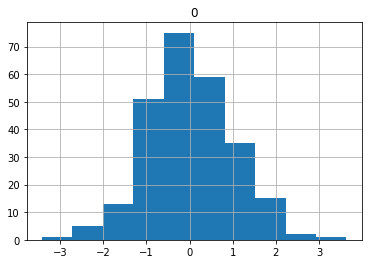

In [14]:
#standardize the sd for each location.
scaler_location_sd = pp.StandardScaler().fit(location_sd)
location_sdS = scaler_location_sd.transform(location_sd)
location_sdS_df=pd.DataFrame(data=location_sdS)
location_sdS_df.hist()

In [15]:
#save for later use
location_sdS_df.to_pickle("./location_sdS_df.pkl")

r^2 on test data : 0.110737


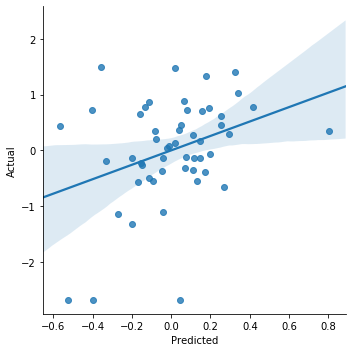

In [39]:
#Add the location variance to the feature and run the lasso regression as before see if it improves
from sklearn.linear_model import LassoCV

#Try reloading and running the analysis. This time with lasso CV to use cross validation
Features3 = pd.read_pickle("./Features3.pkl")
target2 = pd.read_pickle("./target2.pkl")

Features4 = pd.concat([Features3, location_sdS_df], axis=1)


xCV = Features4
yCV = target2 #Turn over

#Split it 80 - 20 for now

XCV_train, XCV_test, YCV_train, YCV_test = train_test_split(xCV, yCV, test_size=0.2)

reg = LassoCV(cv=5).fit(XCV_train, YCV_train)

YpredLassoCV = reg.predict(XCV_test)
r2ScoreLassoCV = r2_score(YCV_test, YpredLassoCV)
print("r^2 on test data : %f" % r2ScoreLassoCV)

ActualPredictionCV = pd.DataFrame({'Actual': YCV_test, 'Predicted': YpredLassoCV})

sb.lmplot(x='Predicted', y='Actual', data=ActualPredictionCV)

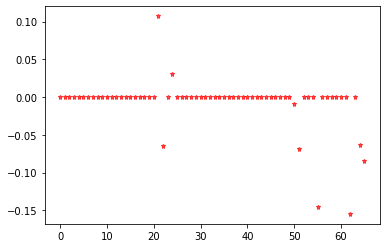

In [41]:
plt.plot(reg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.05$',zorder=7) 

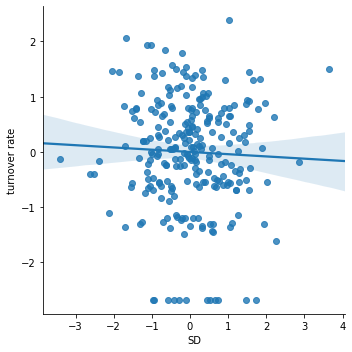

In [49]:
frameMVP = { 'turnover rate': target2, 'SD': location_sdS_df.iloc[:,0] } 
dataForPlotMVP = pd.DataFrame(frameMVP)

sb.lmplot(x='SD', y='turnover rate', data=dataForPlotMVP)


In [57]:
#get the data for the specified location
TestLocationData=data1.loc[data1['LocationCode'] == TestLocationCodes[0]]
#Get only the Answers
TestLocationAnswers=TestLocationData.iloc[:,1:61]
TestLocationAnswers.head()

1   2   3   4   5   6   7   8   9   10  ...  51  52  53  54  55  56  57  \
0    4   5   5   4   4   5   5   3   5   4  ...   5   5   5   5   5   4   5   
27   5   5   2   4   4   3   3   5   4   2  ...   4   4   4   4   4   4   4   
64   2   4   2   2   3   2   2   2   3   3  ...   2   3   2   2   3   2   4   
87   4   5   4   4   4   3   3   3   4   4  ...   4   4   3   3   4   3   4   
89   5   5   4   4   5   4   5   5   5   5  ...   5   5   5   4   5   4   5   

    58  59  60  
0    5   5   5  
27   2   3   4  
64   2   2   2  
87   4   3   4  
89   5   5   5  

[5 rows x 60 columns]

In [7]:
data1['LocationCode'].nunique()

266

Note 20200126: Run PCA without normalization of the features. Later try normalization of the features? Compare variances in the responses? At which dimension? Just for PCA1? Or use all dimensions? Or skewed ness?

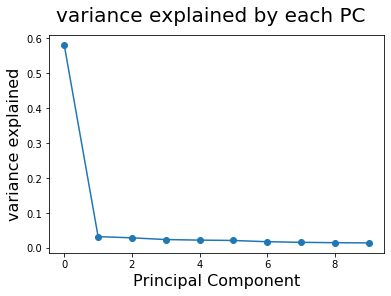

In [8]:
#Run PCA to reduce the features to the top 10 or so.
#Chose 10 components for now because we know this should be enough for this dataset
pcaL=PCA(n_components=10)
pcaL.fit(TestLocationAnswers)

#check the variance explained.
#print(pca.explained_variance_ratio_)
plt.plot(pcaL.explained_variance_ratio_,'o-')
plt.suptitle('variance explained by each PC', fontsize = 20)
plt.ylabel('variance explained', fontsize = 16)
plt.xlabel('Principal Component', fontsize=16)
plt.show()

#trasform the Data
DataArrayPCAL=pcaL.transform(TestLocationAnswers)

#plt.scatter(DataArrayPCA[:,0],DataArrayPCA[:,1])
#plt.show()

#Looks like we need only one PC! I guess it measures one thing very well. Which is great.


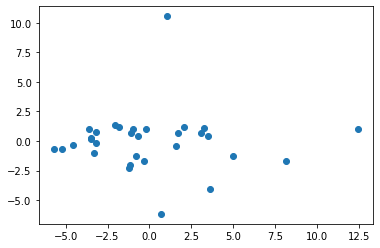

In [28]:
plt.scatter(DataArrayPCAL[:,0],DataArrayPCAL[:,1])
plt.show()

In [10]:
DataArrayPCAL.shape

(189, 10)

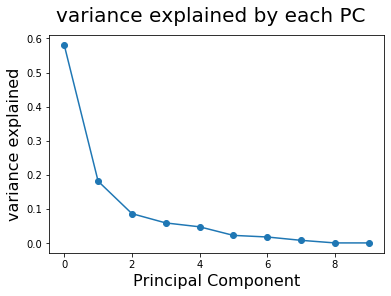

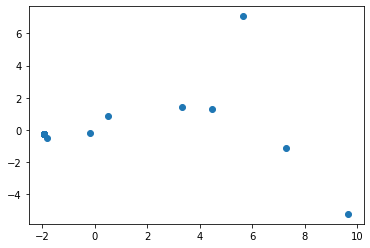

In [29]:
#Run for another location.

#get the data for the specified location
TestLocationData=data1.loc[data1['LocationCode'] == TestLocationCodes[1]]
#Get only the Answers
TestLocationAnswers=TestLocationData.iloc[:,1:61]

#Run PCA to reduce the features to the top 10 or so.

#Chose 10 components for now because we know this should be enough for this dataset
pcaL=PCA(n_components=10)
pcaL.fit(TestLocationAnswers)

#check the variance explained.
#print(pca.explained_variance_ratio_)
plt.plot(pcaL.explained_variance_ratio_,'o-')
plt.suptitle('variance explained by each PC', fontsize = 20)
plt.ylabel('variance explained', fontsize = 16)
plt.xlabel('Principal Component', fontsize=16)
plt.show()

#trasform the Data
DataArrayPCAL=pcaL.transform(TestLocationAnswers)

#plt.scatter(DataArrayPCA[:,0],DataArrayPCA[:,1])
#plt.show()

#Looks like we need only one PC! I guess it measures one thing very well. Which is great.
plt.scatter(DataArrayPCAL[:,0],DataArrayPCAL[:,1])
plt.show()

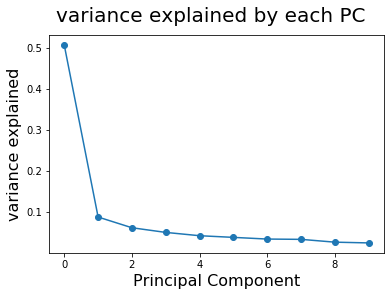

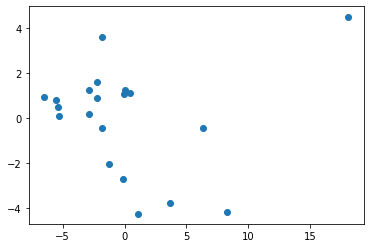

In [30]:
#Another location

#get the data for the specified location
TestLocationData=data1.loc[data1['LocationCode'] == TestLocationCodes[2]]
#Get only the Answers
TestLocationAnswers=TestLocationData.iloc[:,1:61]

#Run PCA to reduce the features to the top 10 or so.

#Chose 10 components for now because we know this should be enough for this dataset
pcaL=PCA(n_components=10)
pcaL.fit(TestLocationAnswers)

#check the variance explained.
#print(pca.explained_variance_ratio_)
plt.plot(pcaL.explained_variance_ratio_,'o-')
plt.suptitle('variance explained by each PC', fontsize = 20)
plt.ylabel('variance explained', fontsize = 16)
plt.xlabel('Principal Component', fontsize=16)
plt.show()

#trasform the Data
DataArrayPCAL=pcaL.transform(TestLocationAnswers)

#plt.scatter(DataArrayPCA[:,0],DataArrayPCA[:,1])
#plt.show()

#Looks like we need only one PC! I guess it measures one thing very well. Which is great.
plt.scatter(DataArrayPCAL[:,0],DataArrayPCAL[:,1])
plt.show()

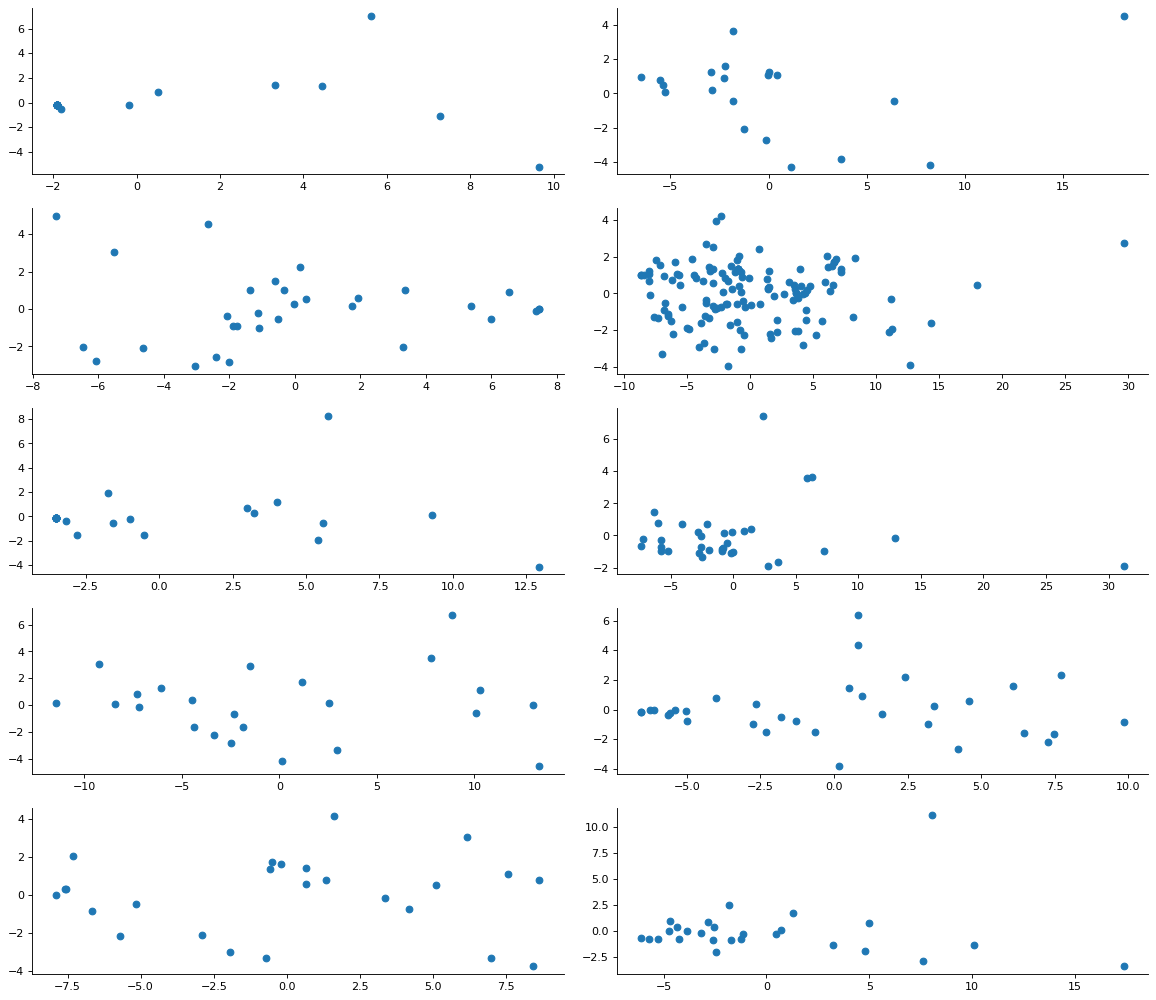

In [31]:
#Run 10 at a time to check all locations for some clustering of responses.
fig=plt.figure(figsize=(18, 16), dpi= 80)
fig.subplots_adjust(hspace=0.2, wspace=0.1)

#For the first 10.
for i in range(1, 11):
    ax = fig.add_subplot(5, 2, i)
    
    #Run PCA and plot the responses using PCA1 and PCA2.
    #get the data for the specified location
    TestLocationData=data1.loc[data1['LocationCode'] == TestLocationCodes[i]]
    #Get only the Answers
    TestLocationAnswers=TestLocationData.iloc[:,1:61]

    #Run PCA to reduce the features to the top 10 or so.
    
    #Chose 10 components for now because we know this should be enough for this dataset
    pcaL=PCA(n_components=10)
    pcaL.fit(TestLocationAnswers)


    #trasform the Data
    DataArrayPCAL=pcaL.transform(TestLocationAnswers)

    #Plot the individual answers on PCA axis to see if there are any clustering of the responses.
    ax.scatter(DataArrayPCAL[:,0],DataArrayPCAL[:,1])
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

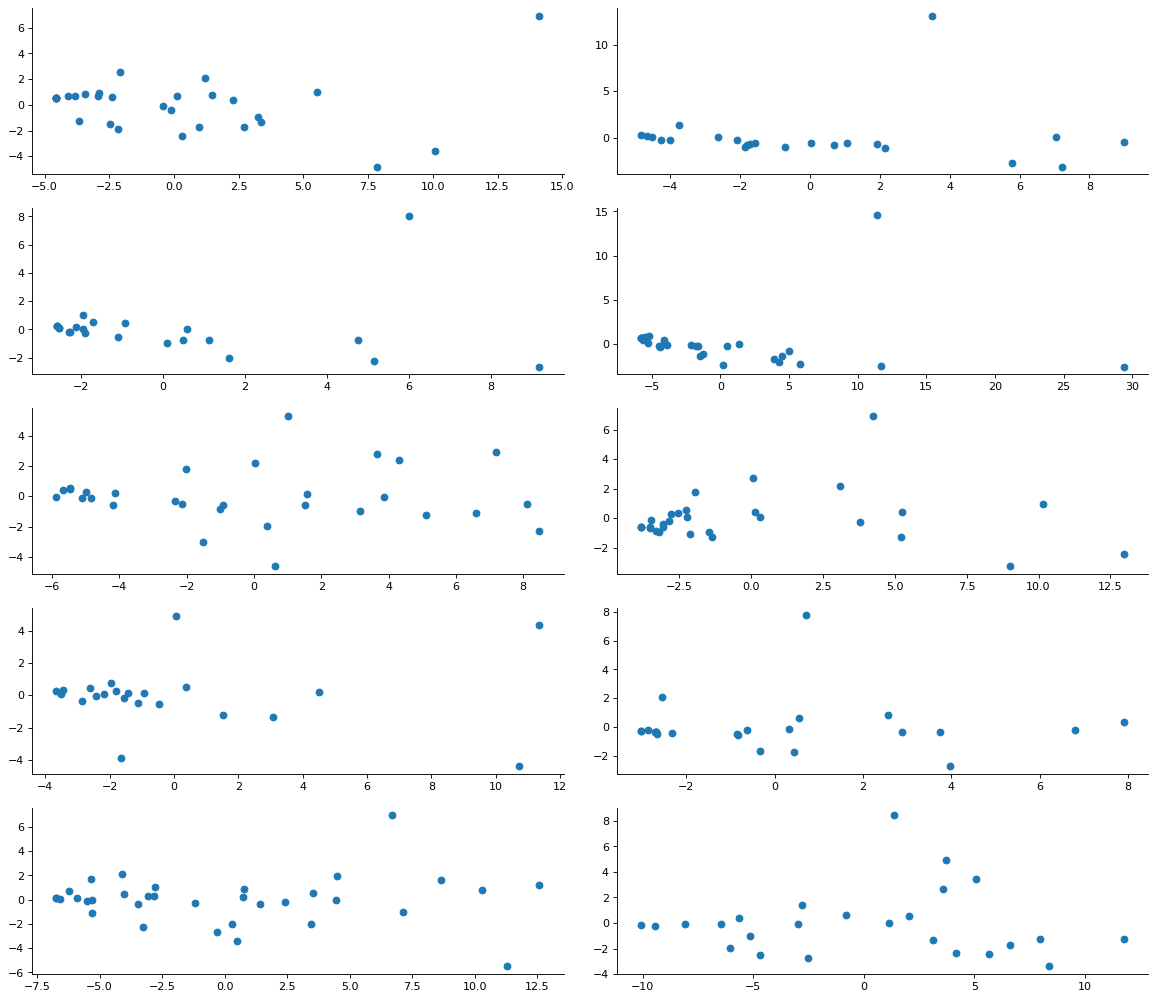

In [32]:
#Run 10 at a time to check all locations for some clustering of responses.
fig=plt.figure(figsize=(18, 16), dpi= 80)
fig.subplots_adjust(hspace=0.2, wspace=0.1)

#For the second 10.
for i in range(11, 21):
    figureIndex=i-10
    ax = fig.add_subplot(5, 2, figureIndex)
    
    #Run PCA and plot the responses using PCA1 and PCA2.
    #get the data for the specified location
    TestLocationData=data1.loc[data1['LocationCode'] == TestLocationCodes[i]]
    #Get only the Answers
    TestLocationAnswers=TestLocationData.iloc[:,1:61]

    #Run PCA to reduce the features to the top 10 or so.
    
    #Chose 10 components for now because we know this should be enough for this dataset
    pcaL=PCA(n_components=10)
    pcaL.fit(TestLocationAnswers)


    #trasform the Data
    DataArrayPCAL=pcaL.transform(TestLocationAnswers)

    #Plot the individual answers on PCA axis to see if there are any clustering of the responses.
    ax.scatter(DataArrayPCAL[:,0],DataArrayPCAL[:,1])
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

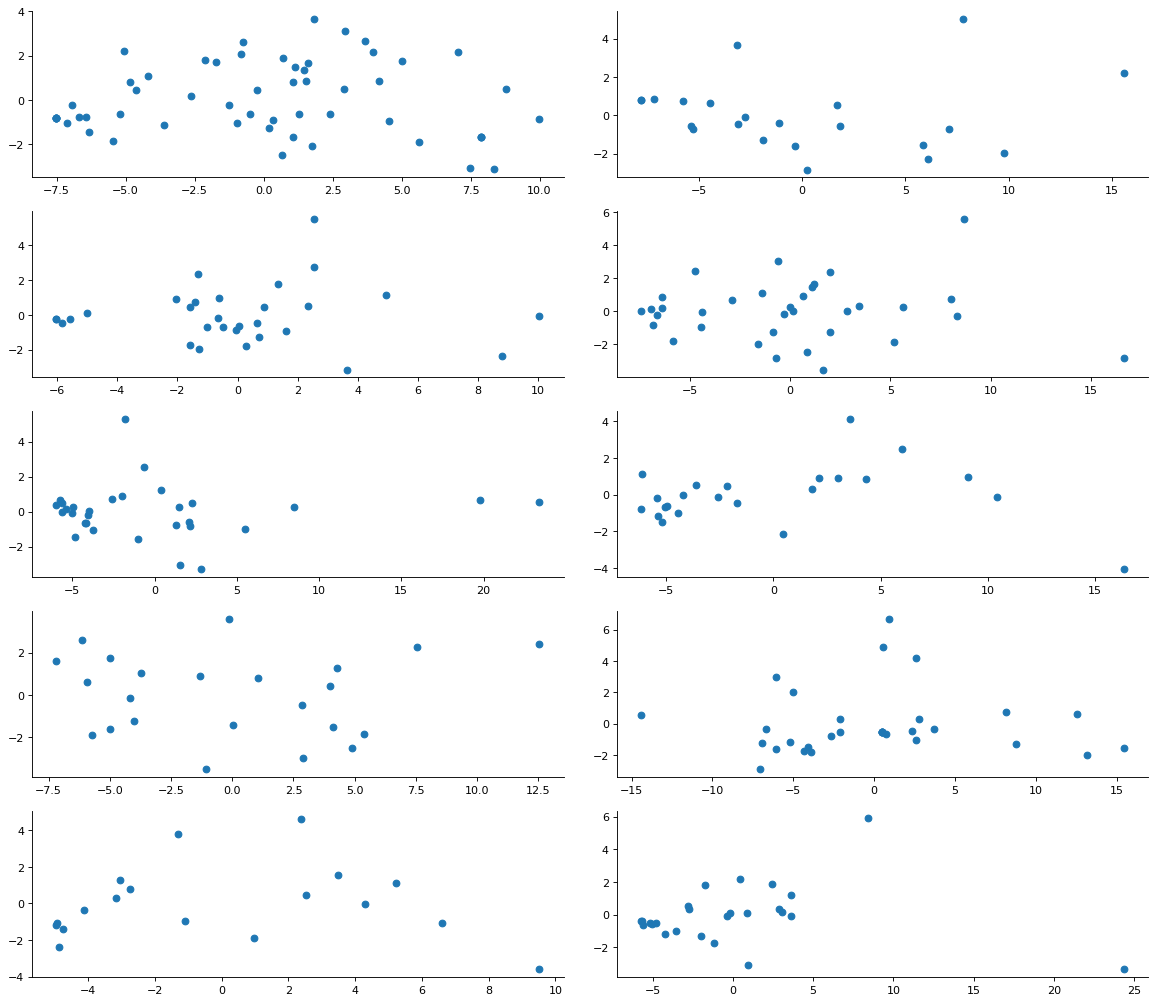

In [25]:
#Run 10 at a time to check all locations for some clustering of responses.
fig=plt.figure(figsize=(18, 16), dpi= 80)
fig.subplots_adjust(hspace=0.2, wspace=0.1)

#For the third 10.
for i in range(21, 31):
    figureIndex=i-20
    ax = fig.add_subplot(5, 2, figureIndex)
    
    #Run PCA and plot the responses using PCA1 and PCA2.
    #get the data for the specified location
    TestLocationData=data1.loc[data1['LocationCode'] == TestLocationCodes[i]]
    #Get only the Answers
    TestLocationAnswers=TestLocationData.iloc[:,1:61]

    #Run PCA to reduce the features to the top 10 or so.
    
    #Chose 10 components for now because we know this should be enough for this dataset
    pcaL=PCA(n_components=10)
    pcaL.fit(TestLocationAnswers)


    #trasform the Data
    DataArrayPCAL=pcaL.transform(TestLocationAnswers)

    #Plot the individual answers on PCA axis to see if there are any clustering of the responses.
    ax.scatter(DataArrayPCAL[:,0],DataArrayPCAL[:,1])
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

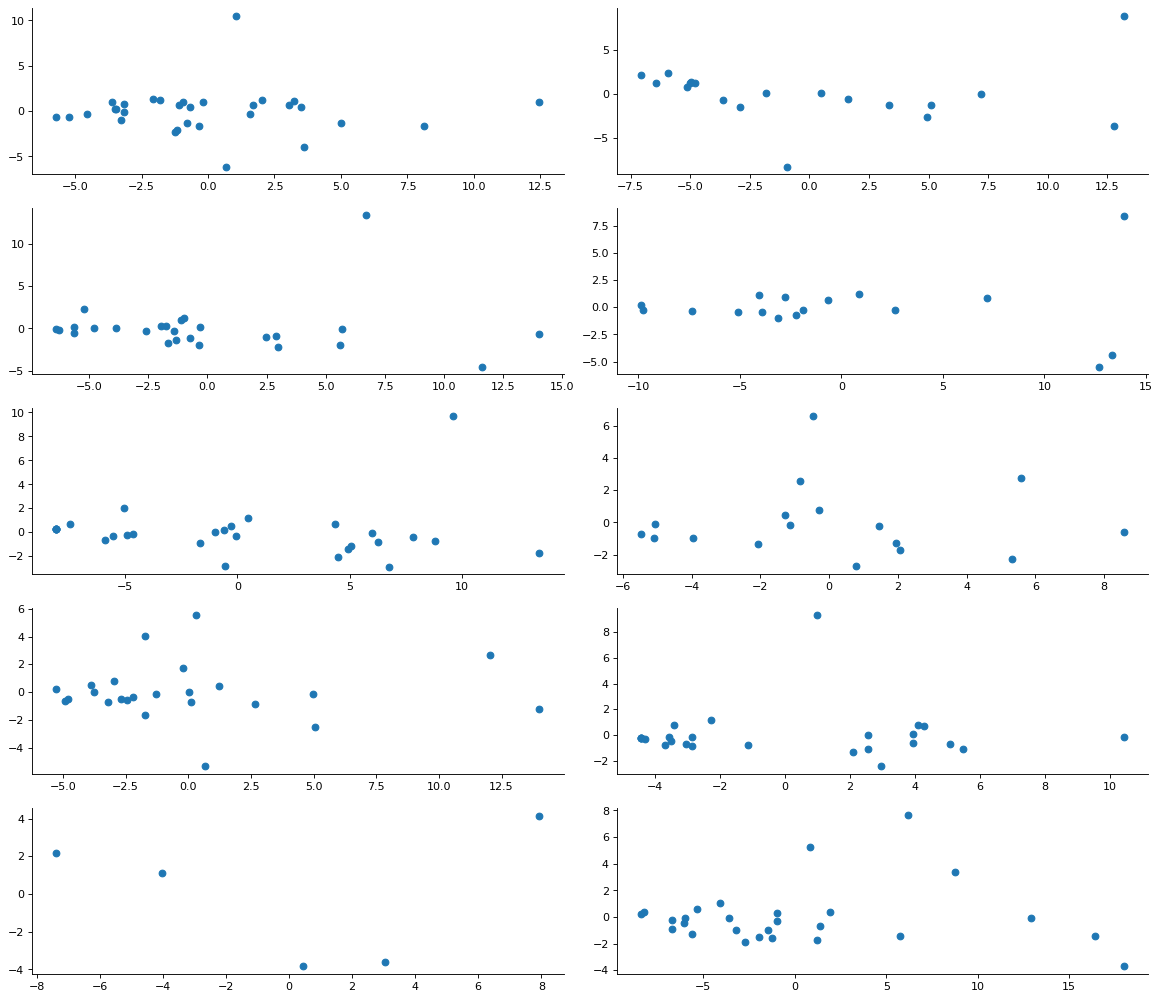

In [33]:
#Run 10 at a time to check all locations for some clustering of responses.
fig=plt.figure(figsize=(18, 16), dpi= 80)
fig.subplots_adjust(hspace=0.2, wspace=0.1)

#For the fourth 10.
for i in range(31, 41):
    figureIndex=i-30
    ax = fig.add_subplot(5, 2, figureIndex)
    
    #Run PCA and plot the responses using PCA1 and PCA2.
    #get the data for the specified location
    TestLocationData=data1.loc[data1['LocationCode'] == TestLocationCodes[i]]
    #Get only the Answers
    TestLocationAnswers=TestLocationData.iloc[:,1:61]

    #Run PCA to reduce the features to the top 2
    
    #Chose 2 components for now 
    pcaL=PCA(n_components=2)
    pcaL.fit(TestLocationAnswers)


    #trasform the Data
    DataArrayPCAL=pcaL.transform(TestLocationAnswers)

    #Plot the individual answers on PCA axis to see if there are any clustering of the responses.
    ax.scatter(DataArrayPCAL[:,0],DataArrayPCAL[:,1])
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

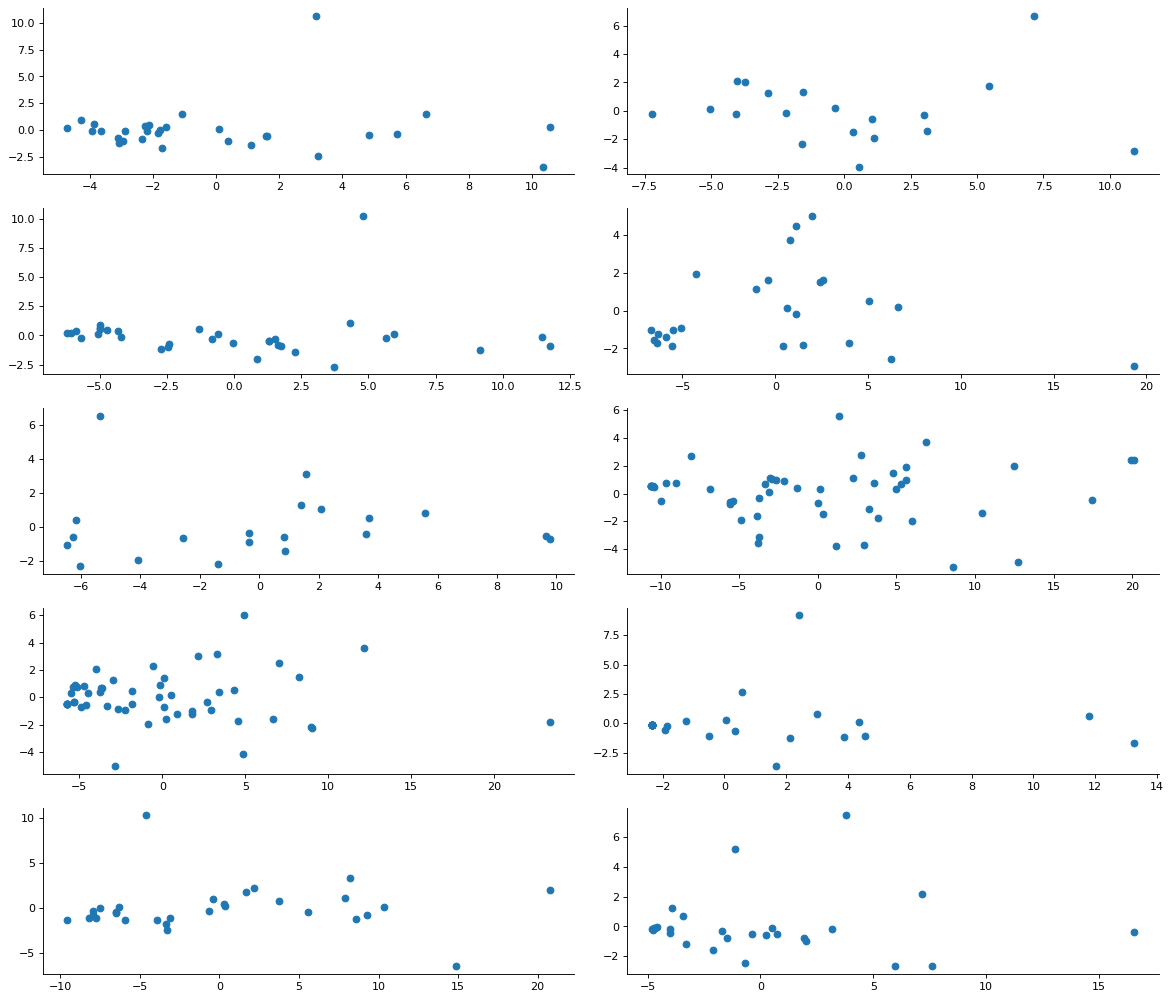

In [34]:
#Run 10 at a time to check all locations for some clustering of responses.
fig=plt.figure(figsize=(18, 16), dpi= 80)
fig.subplots_adjust(hspace=0.2, wspace=0.1)

#For the fifth 10.
for i in range(41, 51):
    figureIndex=i-40
    ax = fig.add_subplot(5, 2, figureIndex)
    
    #Run PCA and plot the responses using PCA1 and PCA2.
    #get the data for the specified location
    TestLocationData=data1.loc[data1['LocationCode'] == TestLocationCodes[i]]
    #Get only the Answers
    TestLocationAnswers=TestLocationData.iloc[:,1:61]

    #Run PCA to reduce the features to the top 2
    
    #Chose 2 components for now 
    pcaL=PCA(n_components=2)
    pcaL.fit(TestLocationAnswers)


    #trasform the Data
    DataArrayPCAL=pcaL.transform(TestLocationAnswers)

    #Plot the individual answers on PCA axis to see if there are any clustering of the responses.
    ax.scatter(DataArrayPCAL[:,0],DataArrayPCAL[:,1])
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

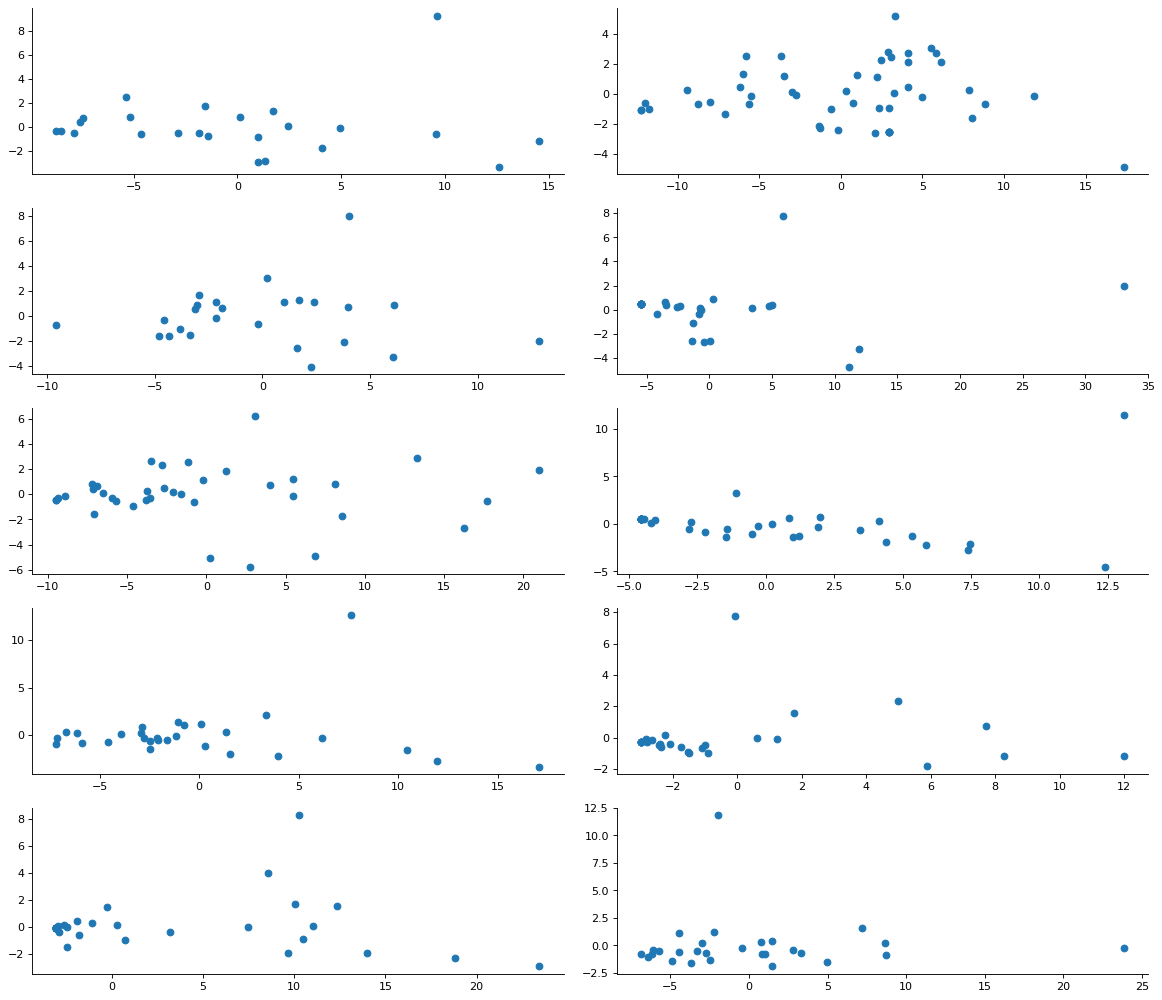

In [35]:
#Run 10 at a time to check all locations for some clustering of responses.
fig=plt.figure(figsize=(18, 16), dpi= 80)
fig.subplots_adjust(hspace=0.2, wspace=0.1)

#For the sixth 10.
for i in range(51, 61):
    figureIndex=i-50
    ax = fig.add_subplot(5, 2, figureIndex)
    
    #Run PCA and plot the responses using PCA1 and PCA2.
    #get the data for the specified location
    TestLocationData=data1.loc[data1['LocationCode'] == TestLocationCodes[i]]
    #Get only the Answers
    TestLocationAnswers=TestLocationData.iloc[:,1:61]

    #Run PCA to reduce the features to the top 2
    
    #Chose 2 components for now 
    pcaL=PCA(n_components=2)
    pcaL.fit(TestLocationAnswers)


    #trasform the Data
    DataArrayPCAL=pcaL.transform(TestLocationAnswers)

    #Plot the individual answers on PCA axis to see if there are any clustering of the responses.
    ax.scatter(DataArrayPCAL[:,0],DataArrayPCAL[:,1])
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

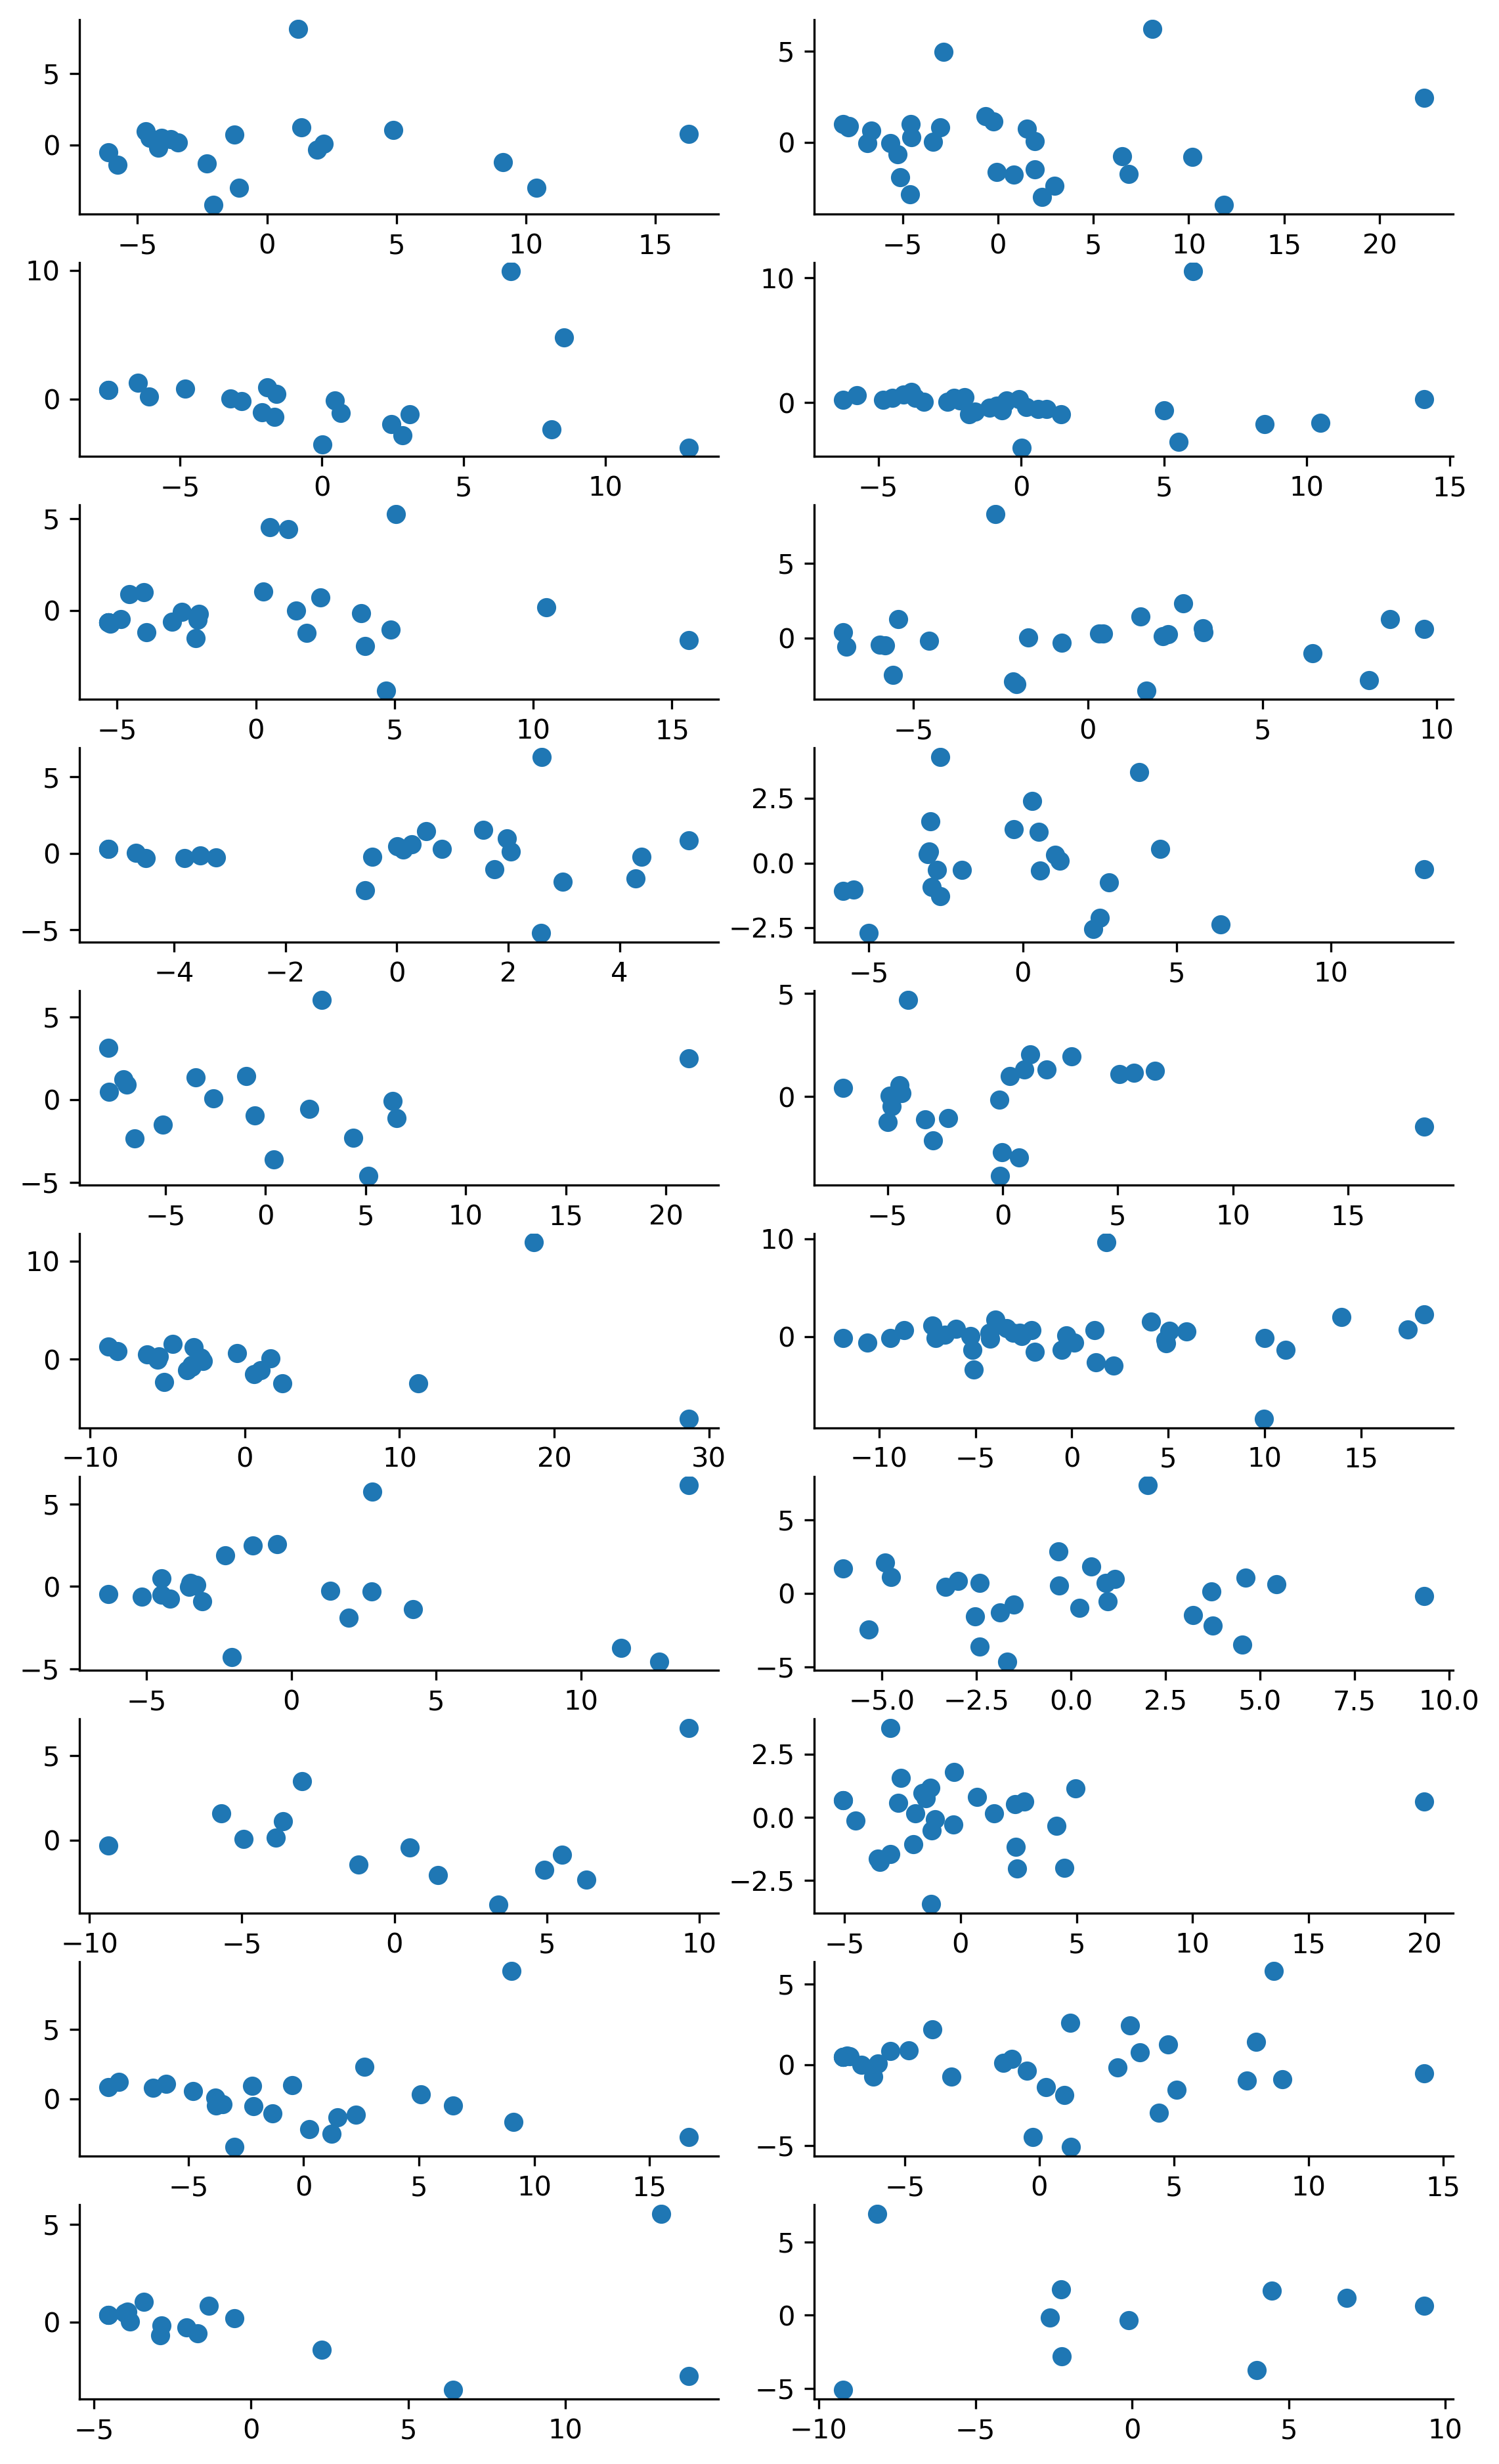

In [41]:
#Run 20 at a time to check all locations for some clustering of responses.
fig=plt.figure(figsize=(9, 16), dpi= 300)
fig.subplots_adjust(hspace=0.25, wspace=0.15)

#For the Go by twenty now.
for i in range(61, 81):
    figureIndex=i-60
    ax = fig.add_subplot(10, 2, figureIndex)
    
    #Run PCA and plot the responses using PCA1 and PCA2.
    #get the data for the specified location
    TestLocationData=data1.loc[data1['LocationCode'] == TestLocationCodes[i]]
    #Get only the Answers
    TestLocationAnswers=TestLocationData.iloc[:,1:61]

    #Run PCA to reduce the features to the top 2
    
    #Chose 2 components for now 
    pcaL=PCA(n_components=2)
    pcaL.fit(TestLocationAnswers)


    #trasform the Data
    DataArrayPCAL=pcaL.transform(TestLocationAnswers)

    #Plot the individual answers on PCA axis to see if there are any clustering of the responses.
    ax.scatter(DataArrayPCAL[:,0],DataArrayPCAL[:,1])
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

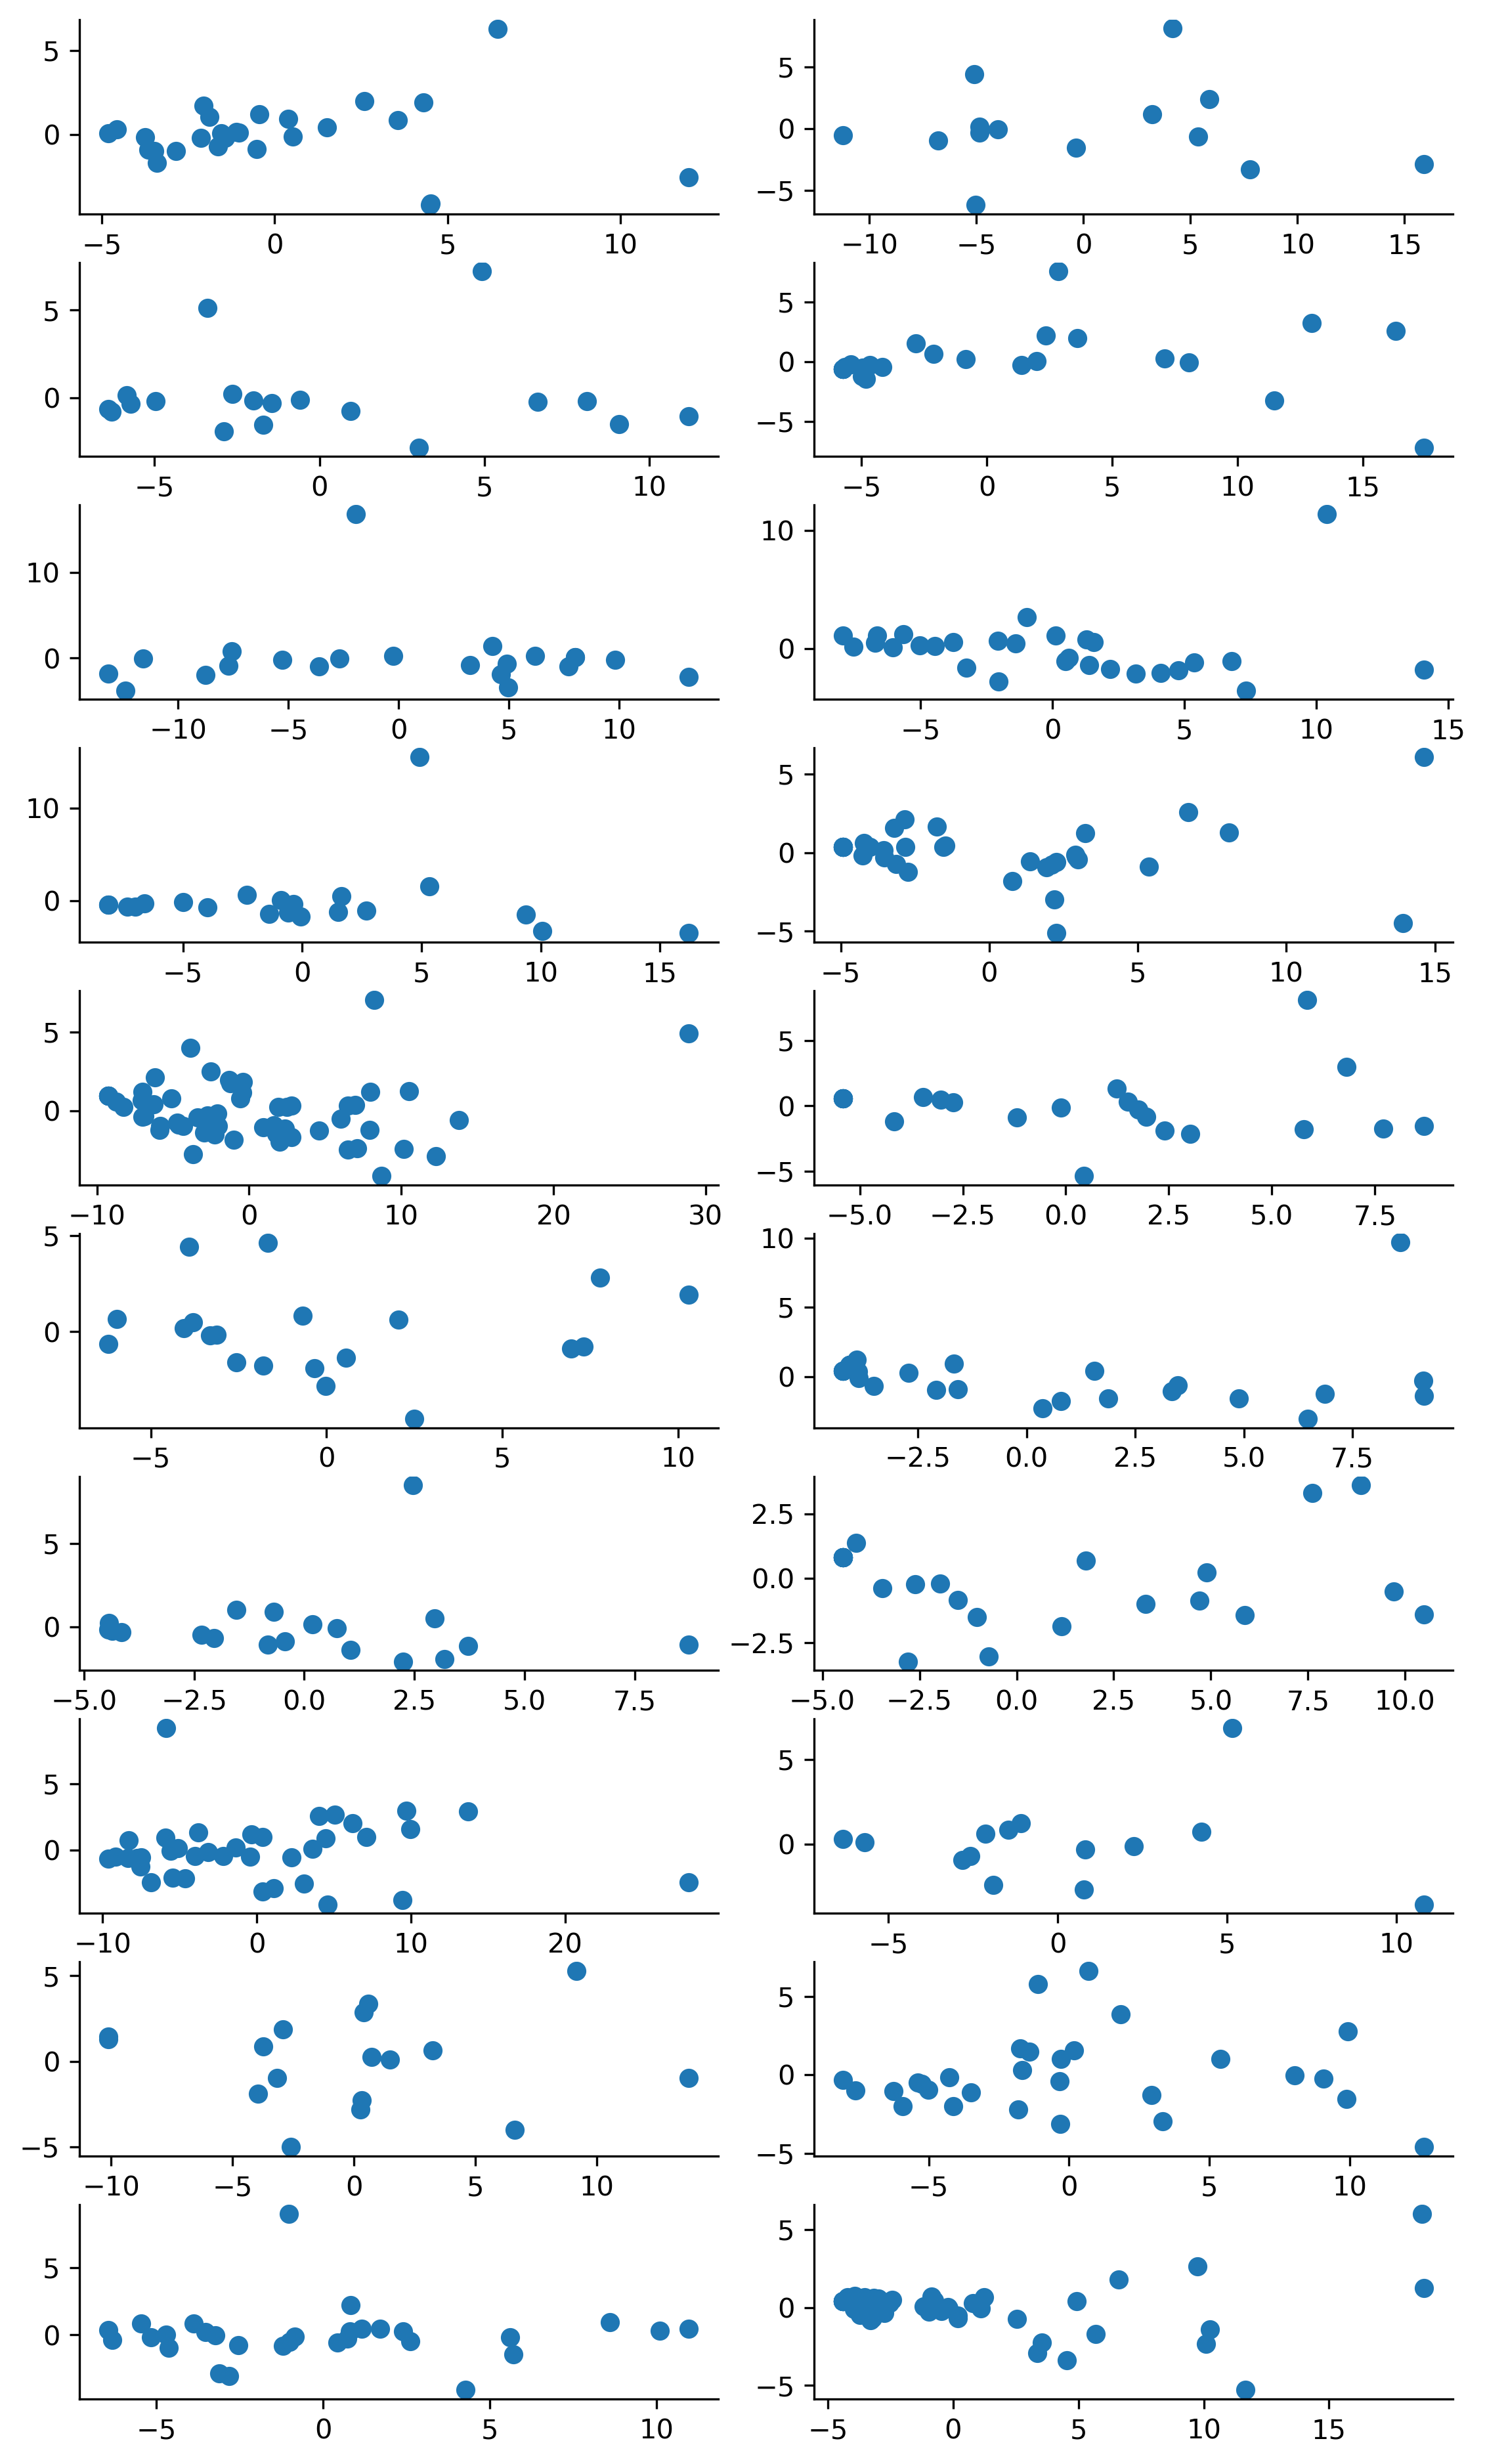

In [42]:
#Run 20 at a time to check all locations for some clustering of responses.
fig=plt.figure(figsize=(9, 16), dpi= 300)
fig.subplots_adjust(hspace=0.25, wspace=0.15)

#For the Go by twenty now.
for i in range(81, 101):
    figureIndex=i-80
    ax = fig.add_subplot(10, 2, figureIndex)
    
    #Run PCA and plot the responses using PCA1 and PCA2.
    #get the data for the specified location
    TestLocationData=data1.loc[data1['LocationCode'] == TestLocationCodes[i]]
    #Get only the Answers
    TestLocationAnswers=TestLocationData.iloc[:,1:61]

    #Run PCA to reduce the features to the top 2
    
    #Chose 2 components for now 
    pcaL=PCA(n_components=2)
    pcaL.fit(TestLocationAnswers)


    #trasform the Data
    DataArrayPCAL=pcaL.transform(TestLocationAnswers)

    #Plot the individual answers on PCA axis to see if there are any clustering of the responses.
    ax.scatter(DataArrayPCAL[:,0],DataArrayPCAL[:,1])
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

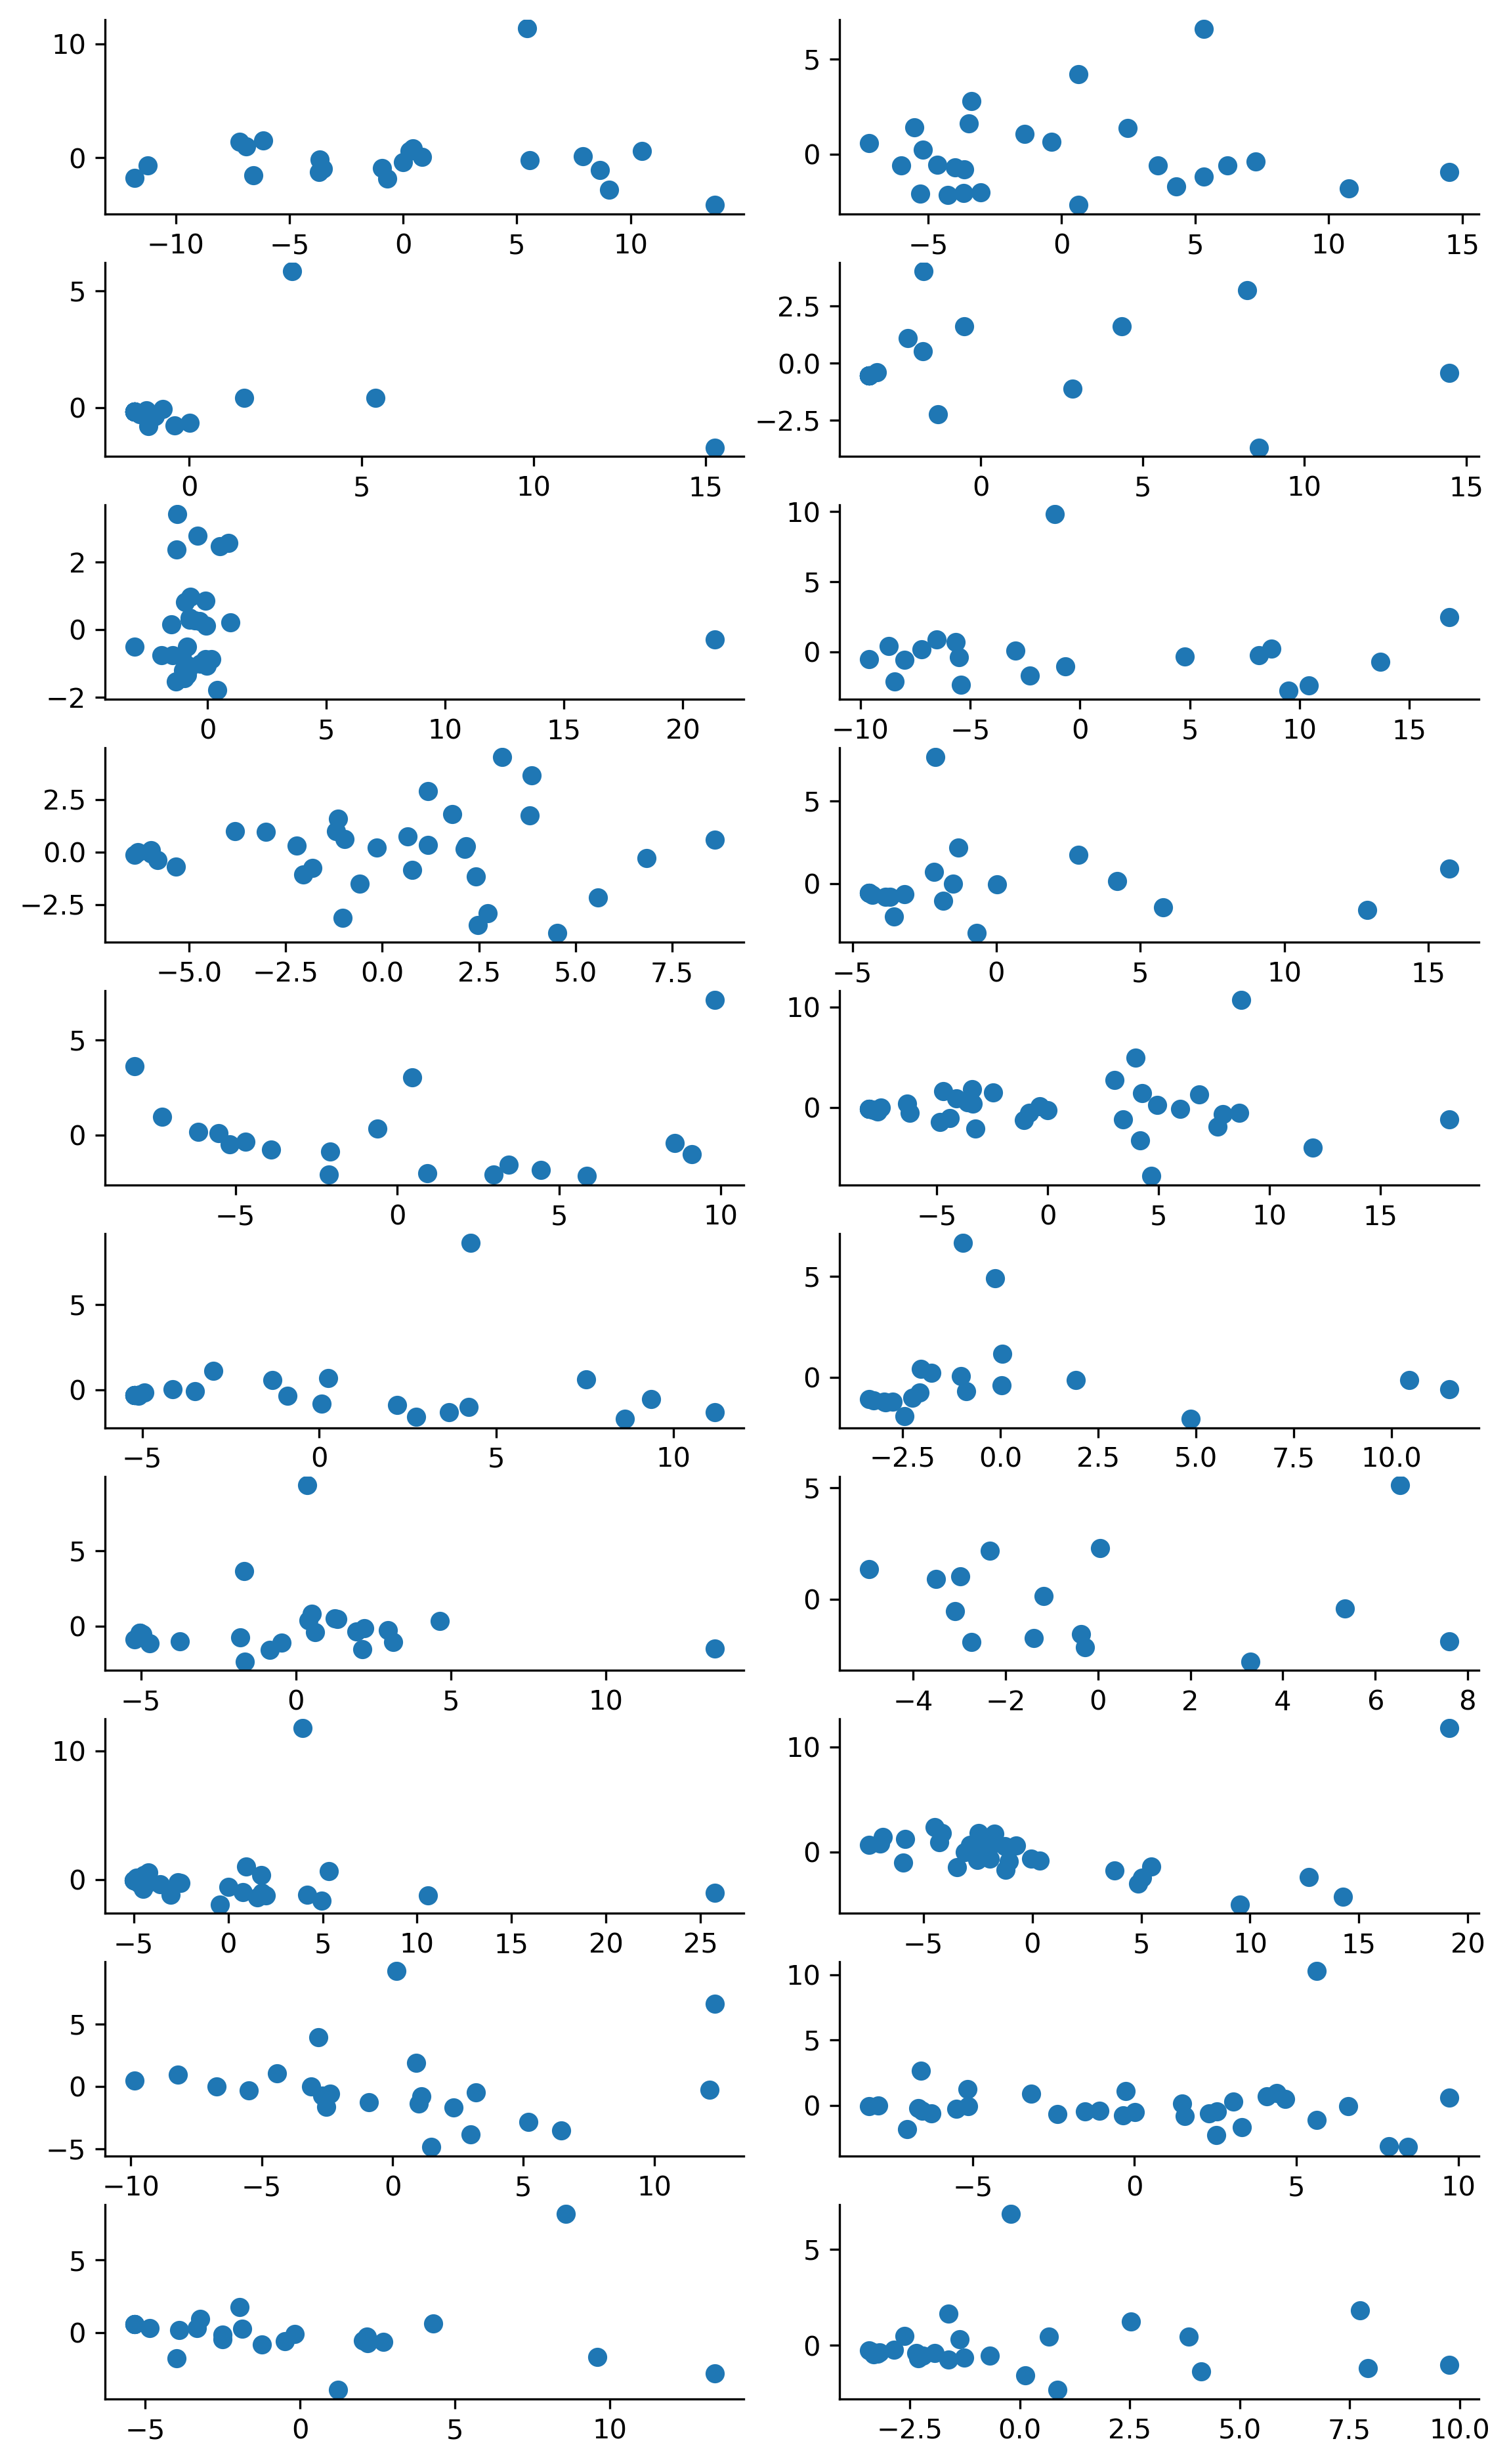

In [43]:
#Run 20 at a time to check all locations for some clustering of responses.
fig=plt.figure(figsize=(9, 16), dpi= 300)
fig.subplots_adjust(hspace=0.25, wspace=0.15)

#For the Go by twenty now.
for i in range(101, 121):
    figureIndex=i-100
    ax = fig.add_subplot(10, 2, figureIndex)
    
    #Run PCA and plot the responses using PCA1 and PCA2.
    #get the data for the specified location
    TestLocationData=data1.loc[data1['LocationCode'] == TestLocationCodes[i]]
    #Get only the Answers
    TestLocationAnswers=TestLocationData.iloc[:,1:61]

    #Run PCA to reduce the features to the top 2
    
    #Chose 2 components for now 
    pcaL=PCA(n_components=2)
    pcaL.fit(TestLocationAnswers)


    #trasform the Data
    DataArrayPCAL=pcaL.transform(TestLocationAnswers)

    #Plot the individual answers on PCA axis to see if there are any clustering of the responses.
    ax.scatter(DataArrayPCAL[:,0],DataArrayPCAL[:,1])
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

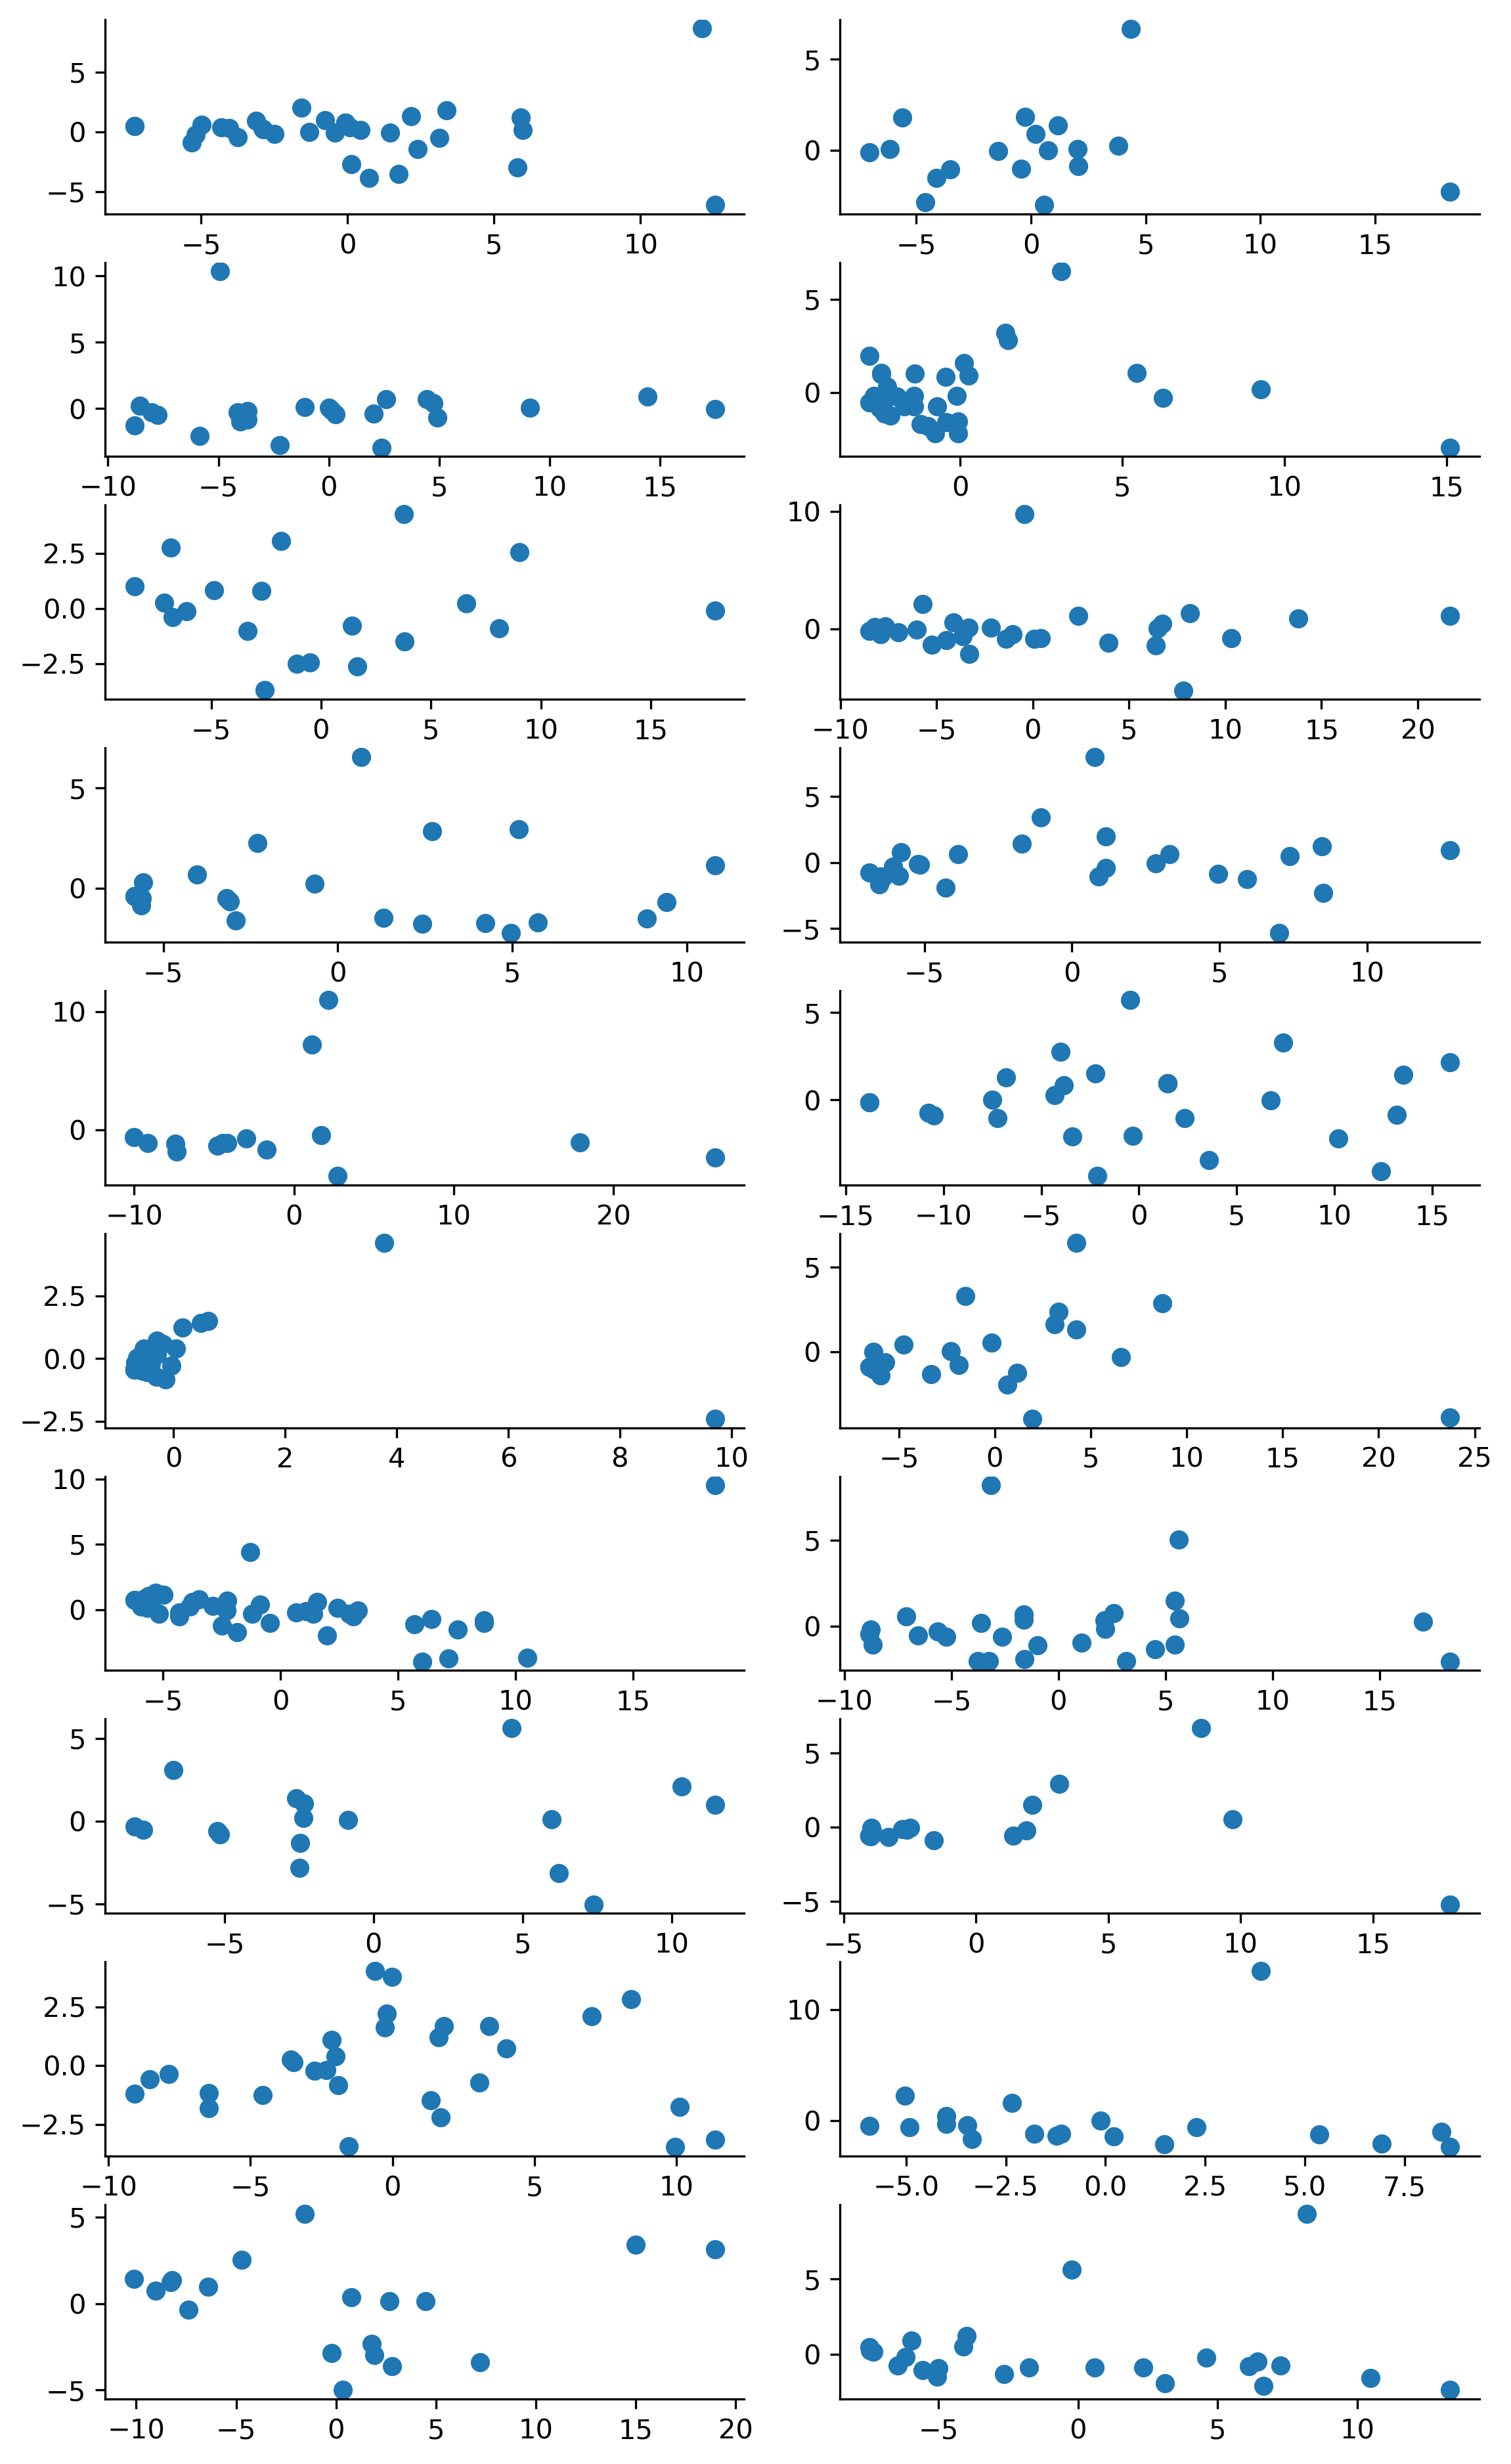

In [44]:
#Run 20 at a time to check all locations for some clustering of responses.
fig=plt.figure(figsize=(9, 16), dpi= 300)
fig.subplots_adjust(hspace=0.25, wspace=0.15)

#For the Go by twenty now.
for i in range(121, 141):
    figureIndex=i-120
    ax = fig.add_subplot(10, 2, figureIndex)
    
    #Run PCA and plot the responses using PCA1 and PCA2.
    #get the data for the specified location
    TestLocationData=data1.loc[data1['LocationCode'] == TestLocationCodes[i]]
    #Get only the Answers
    TestLocationAnswers=TestLocationData.iloc[:,1:61]

    #Run PCA to reduce the features to the top 2
    
    #Chose 2 components for now 
    pcaL=PCA(n_components=2)
    pcaL.fit(TestLocationAnswers)


    #trasform the Data
    DataArrayPCAL=pcaL.transform(TestLocationAnswers)

    #Plot the individual answers on PCA axis to see if there are any clustering of the responses.
    ax.scatter(DataArrayPCAL[:,0],DataArrayPCAL[:,1])
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

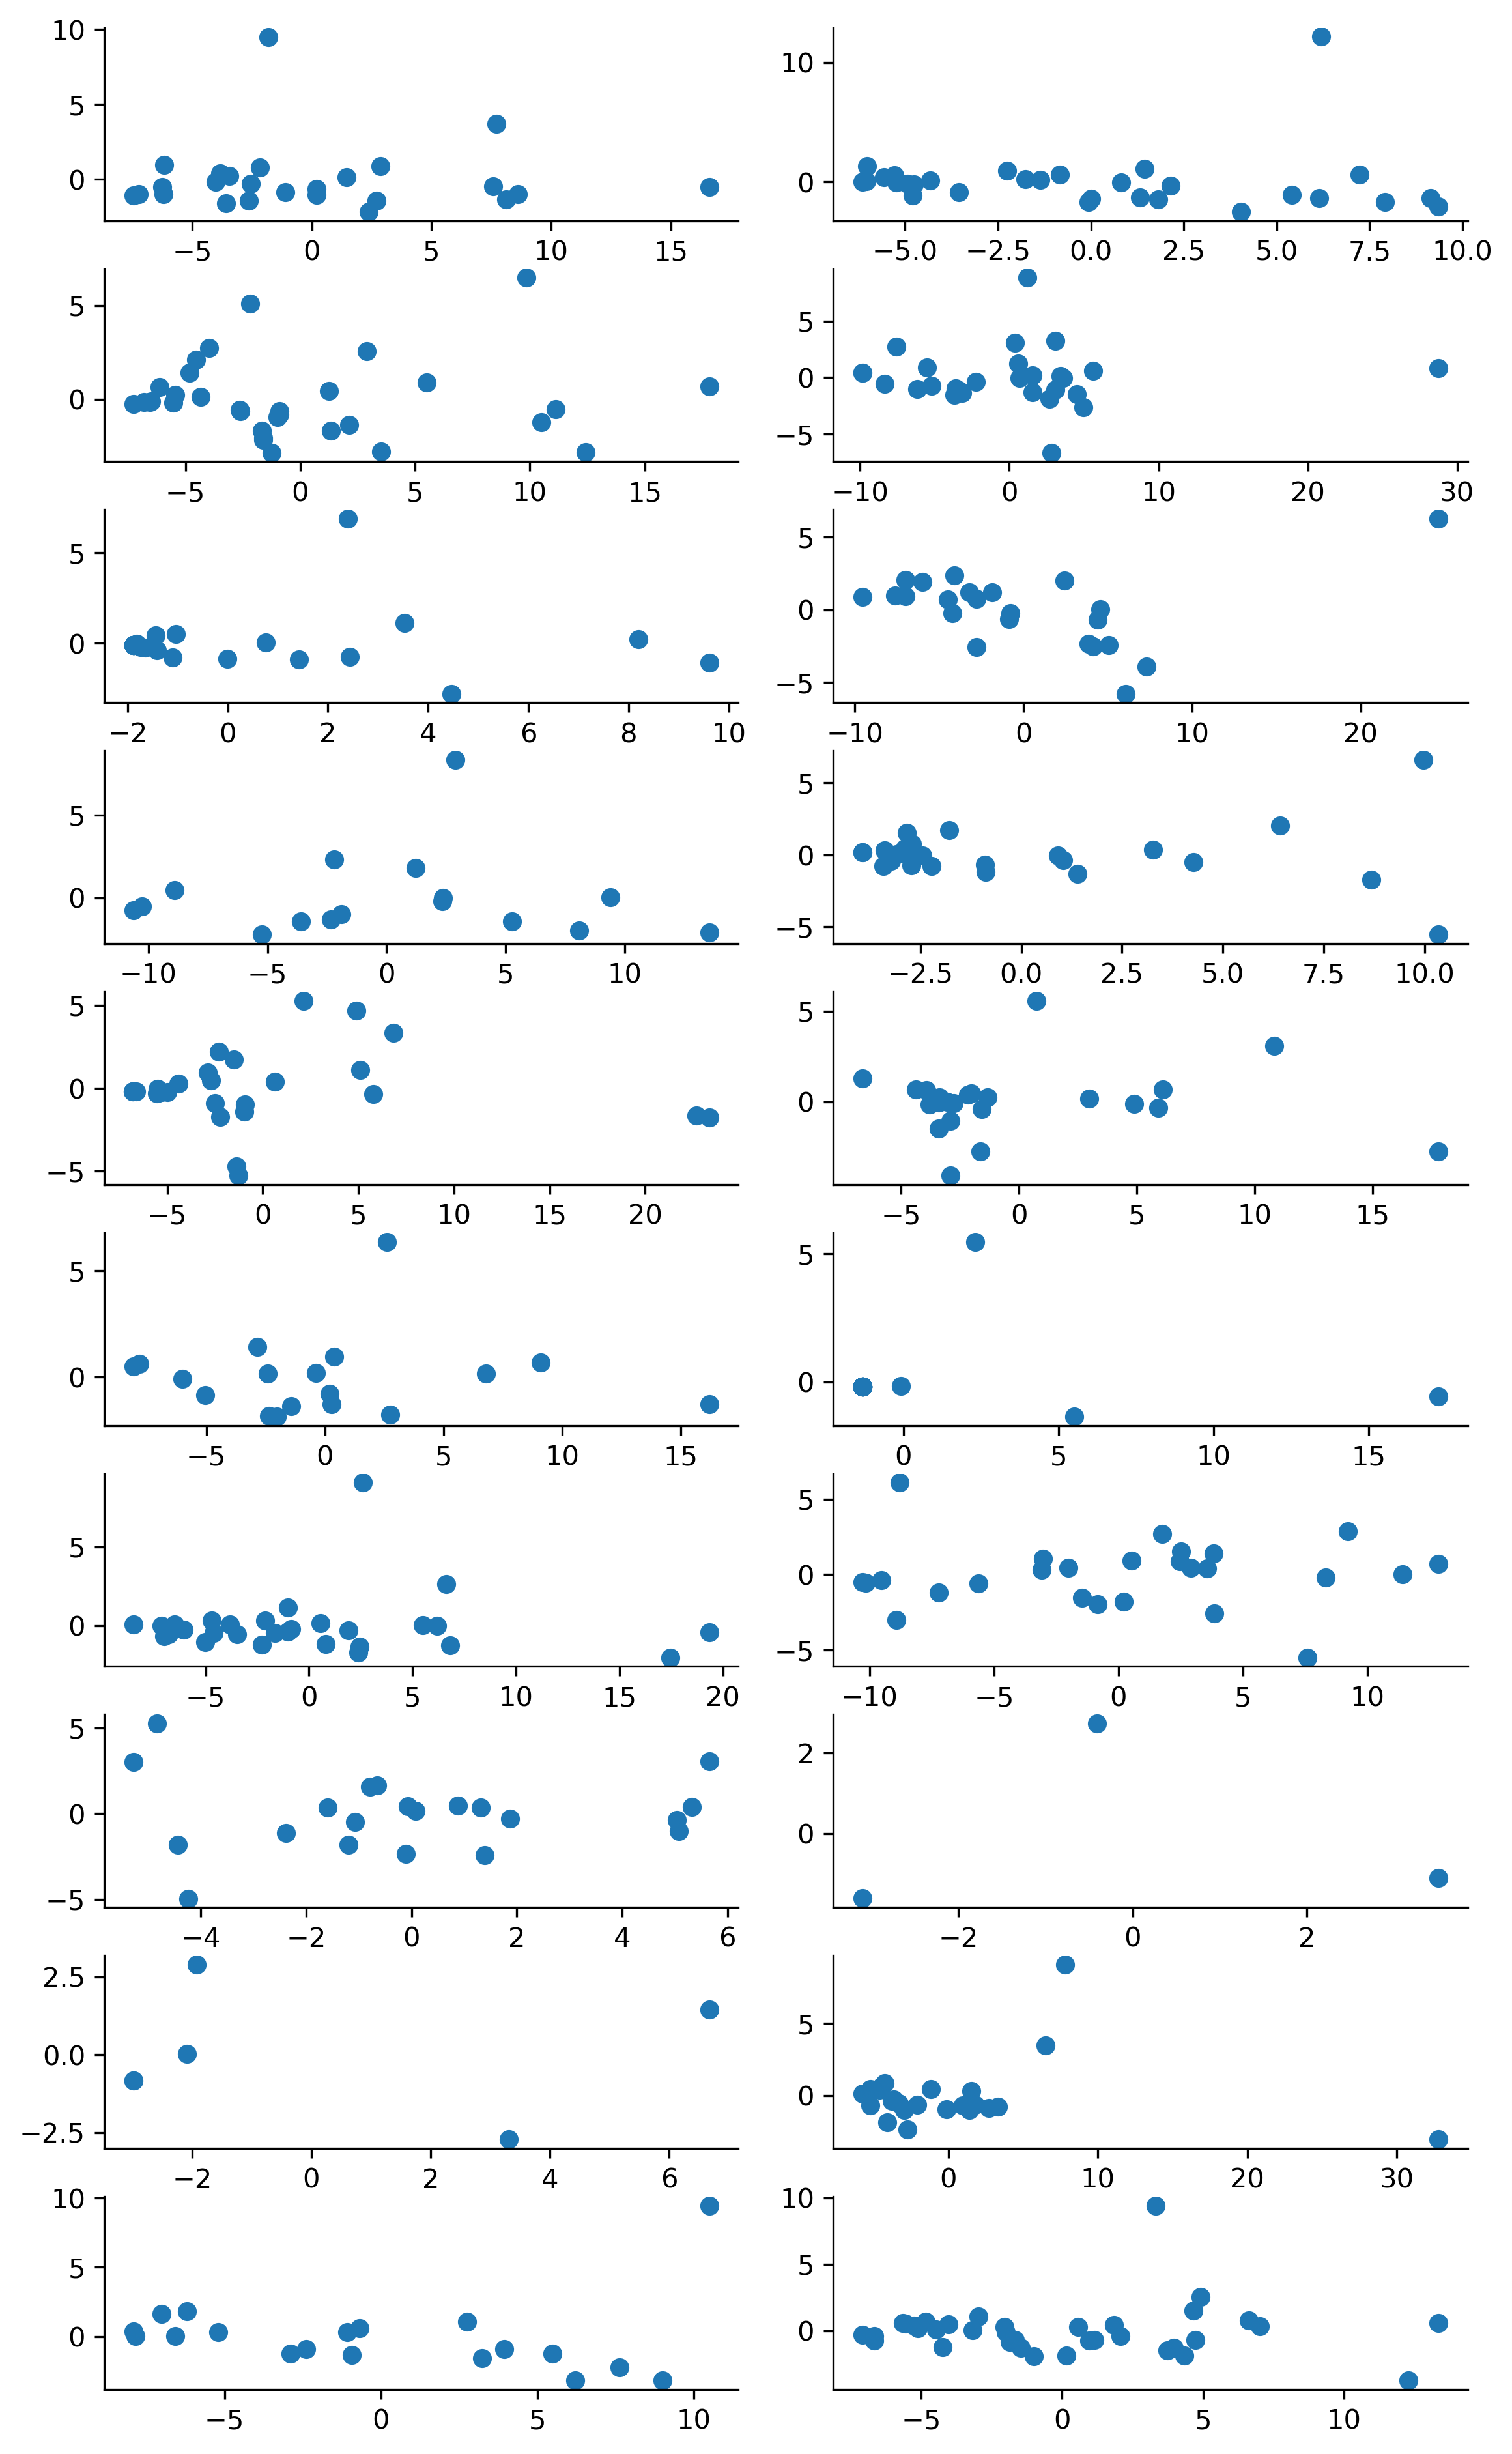

In [45]:
#Run 20 at a time to check all locations for some clustering of responses.
fig=plt.figure(figsize=(9, 16), dpi= 300)
fig.subplots_adjust(hspace=0.25, wspace=0.15)

#For the Go by twenty now.
for i in range(141, 161):
    figureIndex=i-140
    ax = fig.add_subplot(10, 2, figureIndex)
    
    #Run PCA and plot the responses using PCA1 and PCA2.
    #get the data for the specified location
    TestLocationData=data1.loc[data1['LocationCode'] == TestLocationCodes[i]]
    #Get only the Answers
    TestLocationAnswers=TestLocationData.iloc[:,1:61]

    #Run PCA to reduce the features to the top 2
    
    #Chose 2 components for now 
    pcaL=PCA(n_components=2)
    pcaL.fit(TestLocationAnswers)


    #trasform the Data
    DataArrayPCAL=pcaL.transform(TestLocationAnswers)

    #Plot the individual answers on PCA axis to see if there are any clustering of the responses.
    ax.scatter(DataArrayPCAL[:,0],DataArrayPCAL[:,1])
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

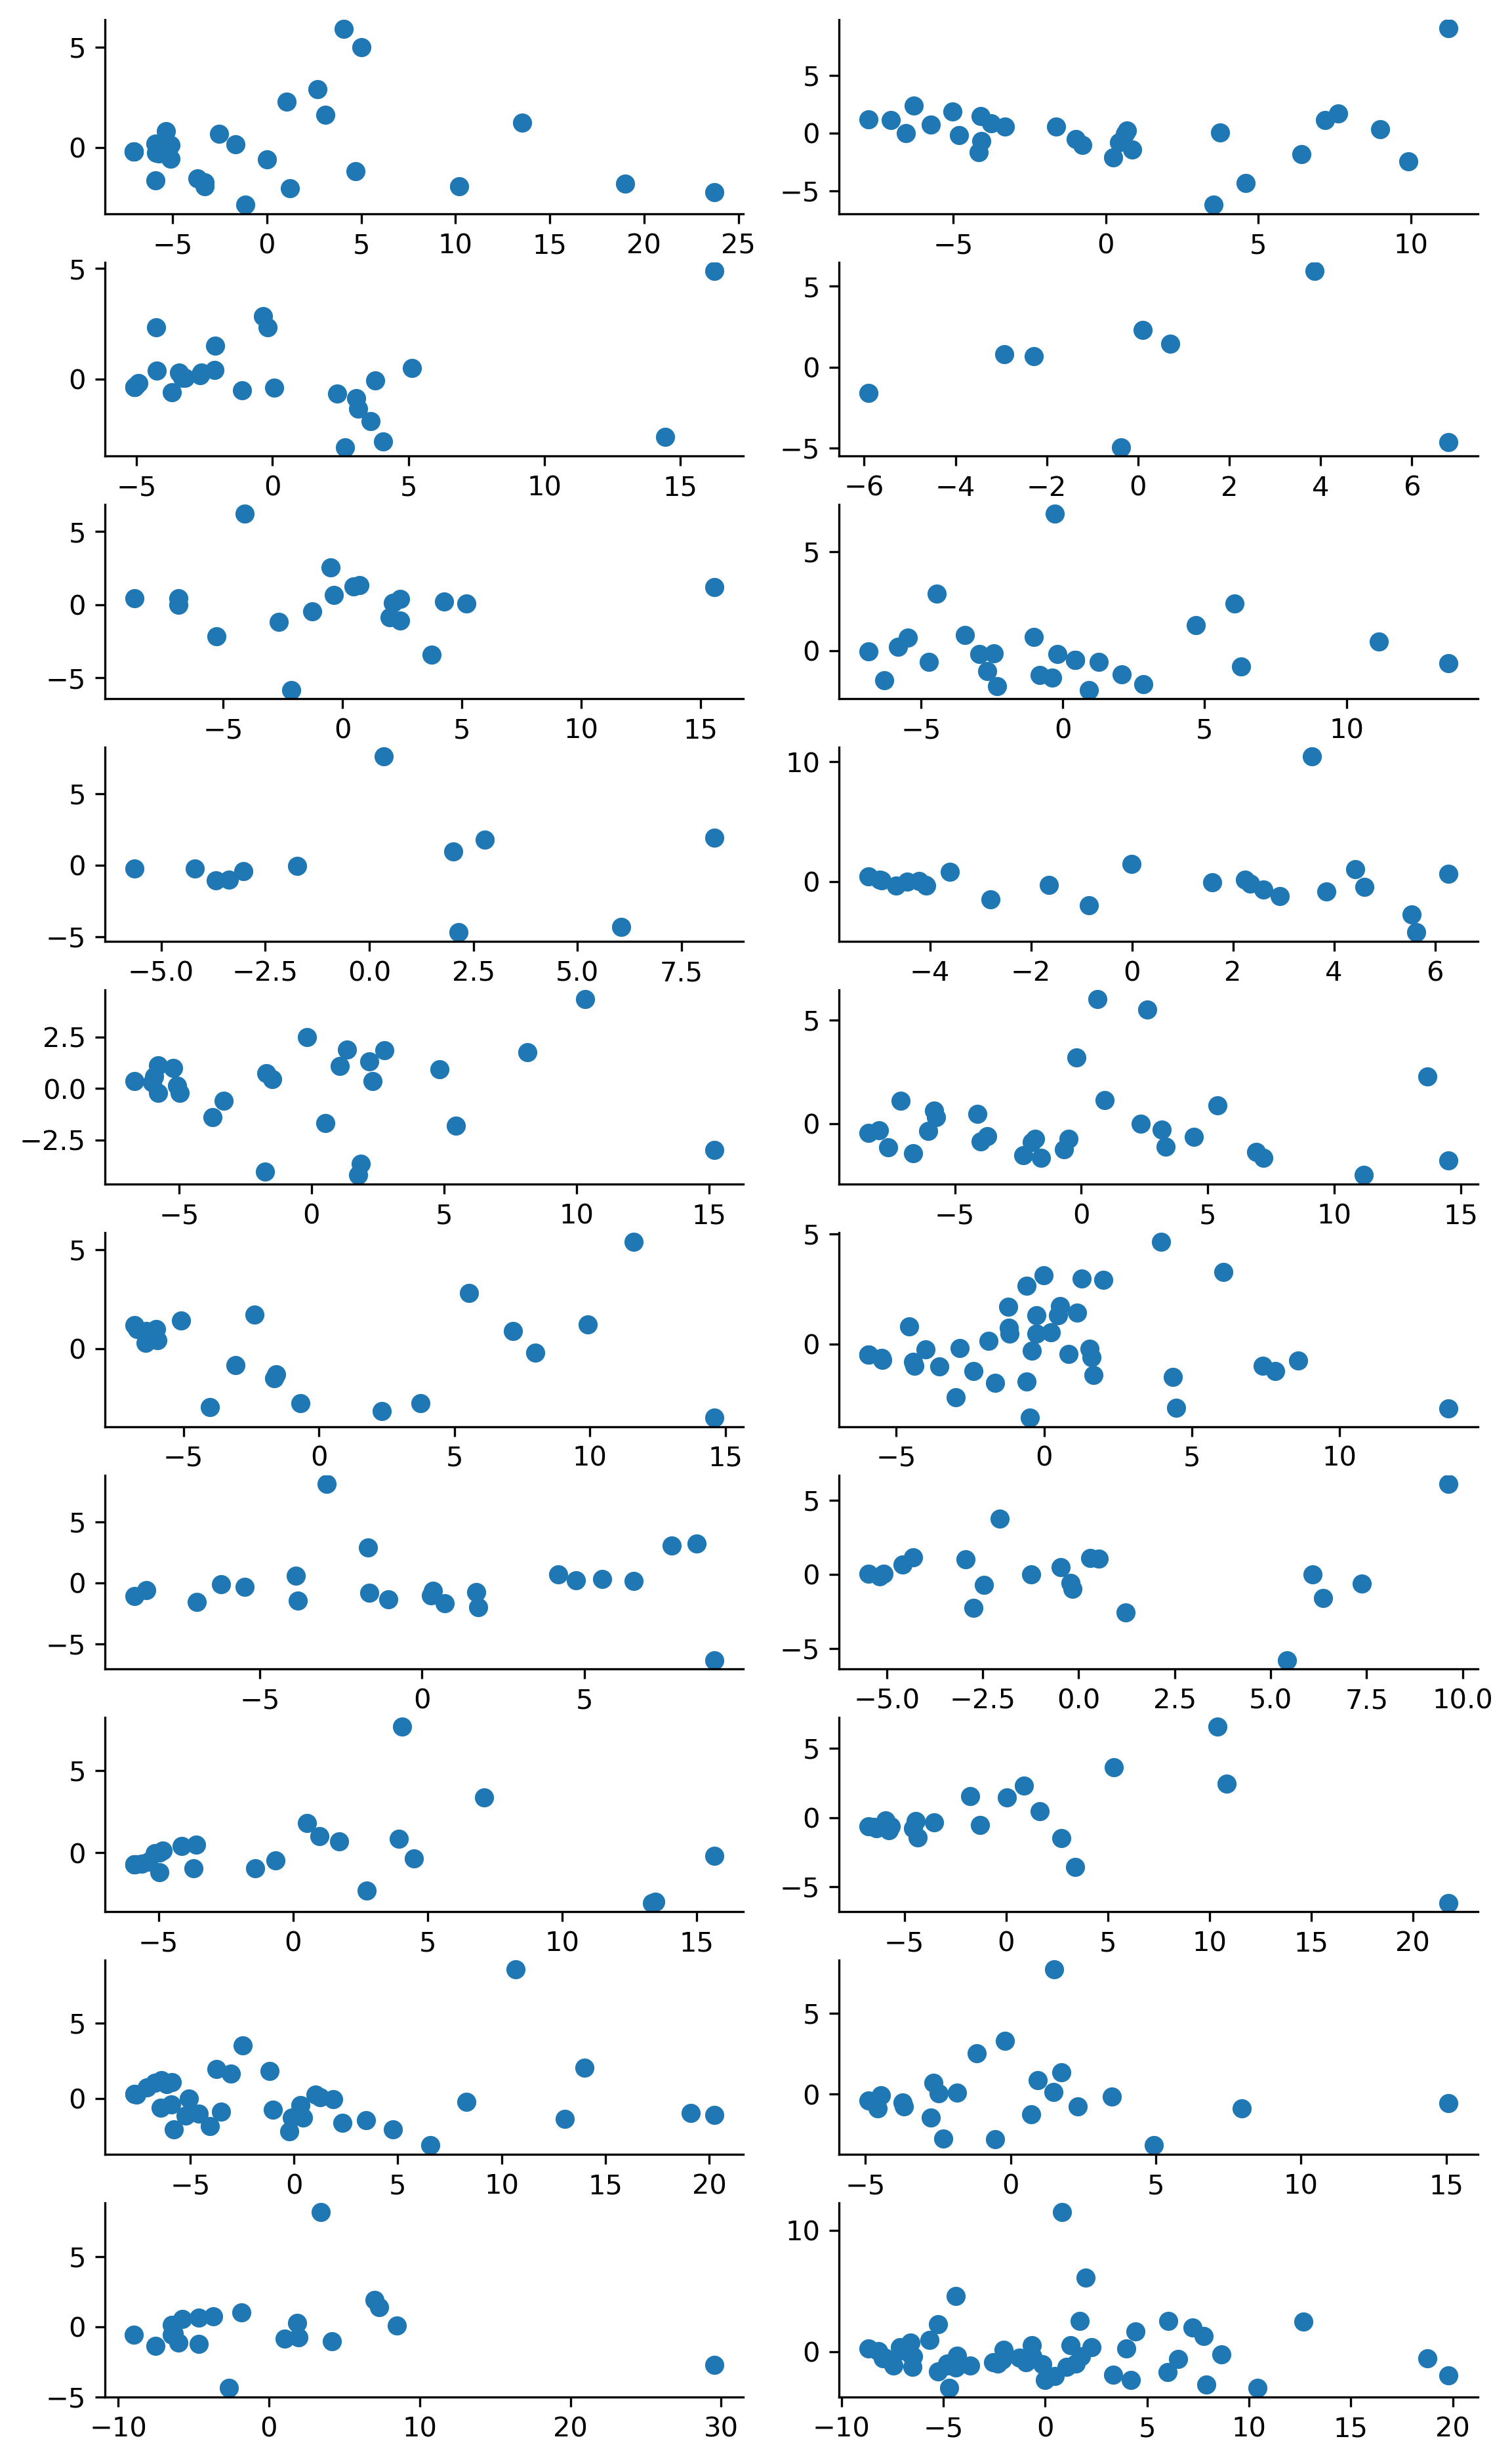

In [46]:
#Run 20 at a time to check all locations for some clustering of responses.
fig=plt.figure(figsize=(9, 16), dpi= 300)
fig.subplots_adjust(hspace=0.25, wspace=0.15)

#For the Go by twenty now.
for i in range(161, 181):
    figureIndex=i-160
    ax = fig.add_subplot(10, 2, figureIndex)
    
    #Run PCA and plot the responses using PCA1 and PCA2.
    #get the data for the specified location
    TestLocationData=data1.loc[data1['LocationCode'] == TestLocationCodes[i]]
    #Get only the Answers
    TestLocationAnswers=TestLocationData.iloc[:,1:61]

    #Run PCA to reduce the features to the top 2
    
    #Chose 2 components for now 
    pcaL=PCA(n_components=2)
    pcaL.fit(TestLocationAnswers)


    #trasform the Data
    DataArrayPCAL=pcaL.transform(TestLocationAnswers)

    #Plot the individual answers on PCA axis to see if there are any clustering of the responses.
    ax.scatter(DataArrayPCAL[:,0],DataArrayPCAL[:,1])
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

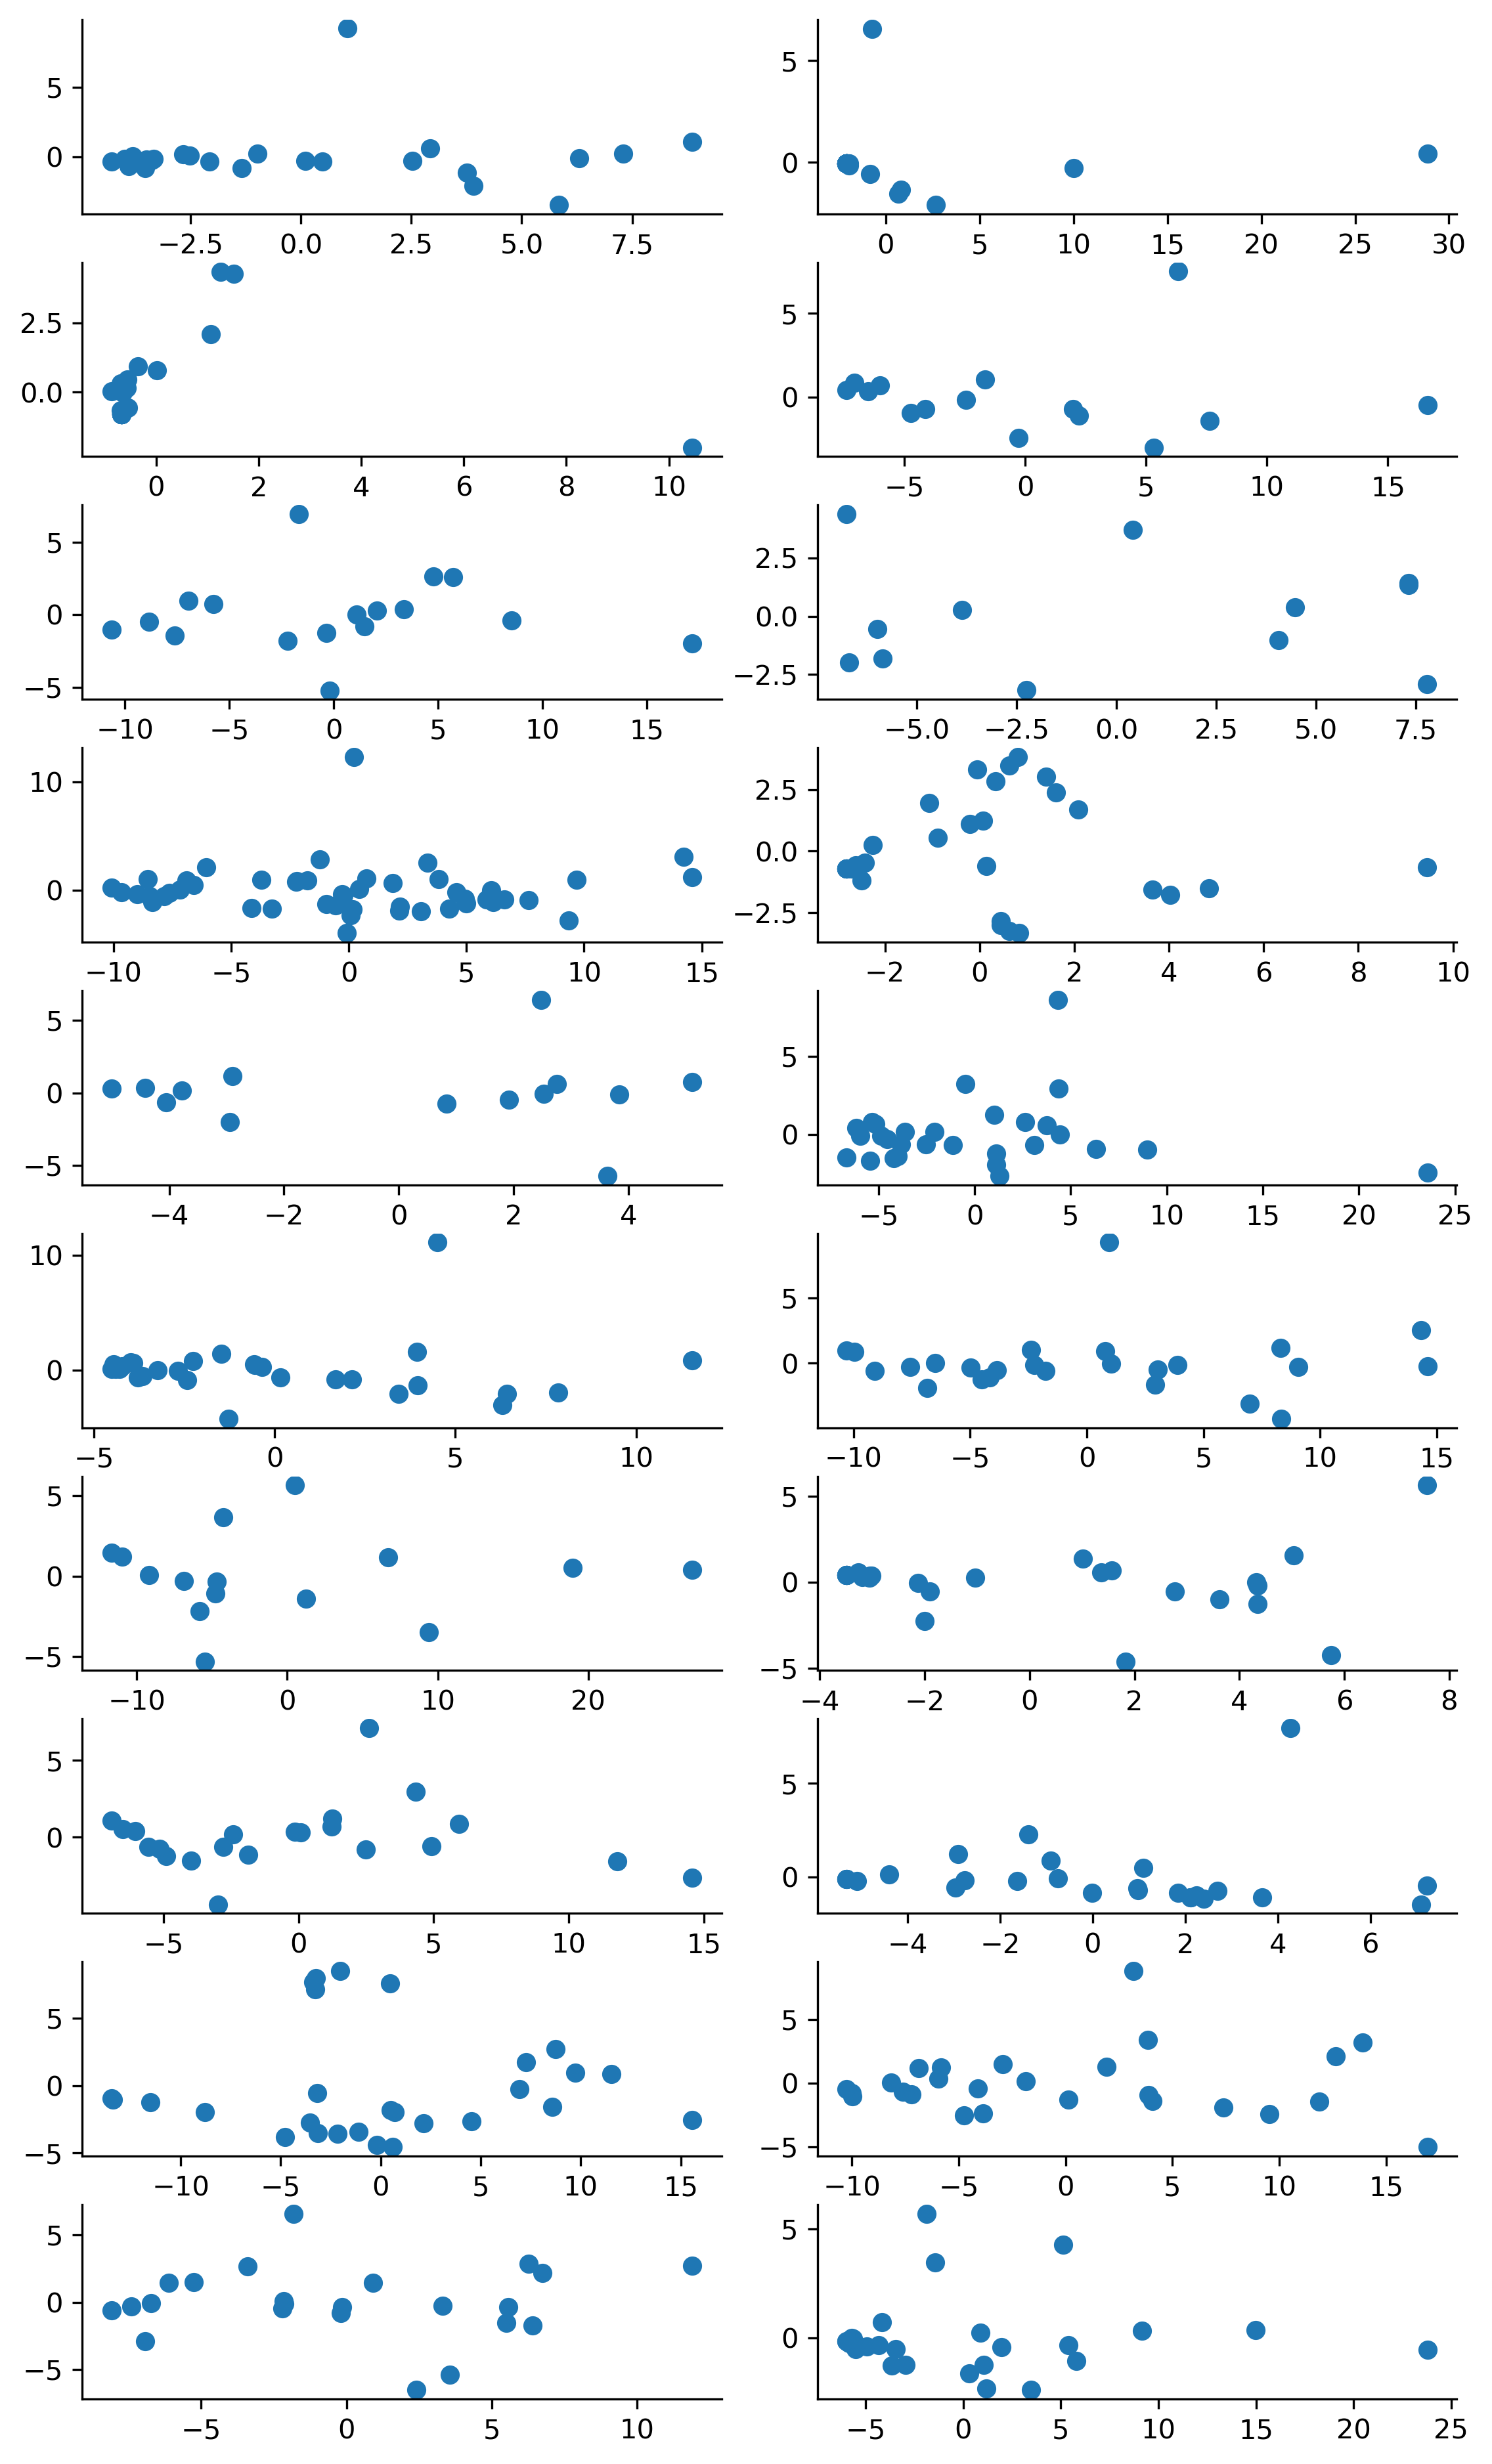

In [47]:
#Run 20 at a time to check all locations for some clustering of responses.
fig=plt.figure(figsize=(9, 16), dpi= 300)
fig.subplots_adjust(hspace=0.25, wspace=0.15)

#For the Go by twenty now.
for i in range(181, 201):
    figureIndex=i-180
    ax = fig.add_subplot(10, 2, figureIndex)
    
    #Run PCA and plot the responses using PCA1 and PCA2.
    #get the data for the specified location
    TestLocationData=data1.loc[data1['LocationCode'] == TestLocationCodes[i]]
    #Get only the Answers
    TestLocationAnswers=TestLocationData.iloc[:,1:61]

    #Run PCA to reduce the features to the top 2
    
    #Chose 2 components for now 
    pcaL=PCA(n_components=2)
    pcaL.fit(TestLocationAnswers)


    #trasform the Data
    DataArrayPCAL=pcaL.transform(TestLocationAnswers)

    #Plot the individual answers on PCA axis to see if there are any clustering of the responses.
    ax.scatter(DataArrayPCAL[:,0],DataArrayPCAL[:,1])
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

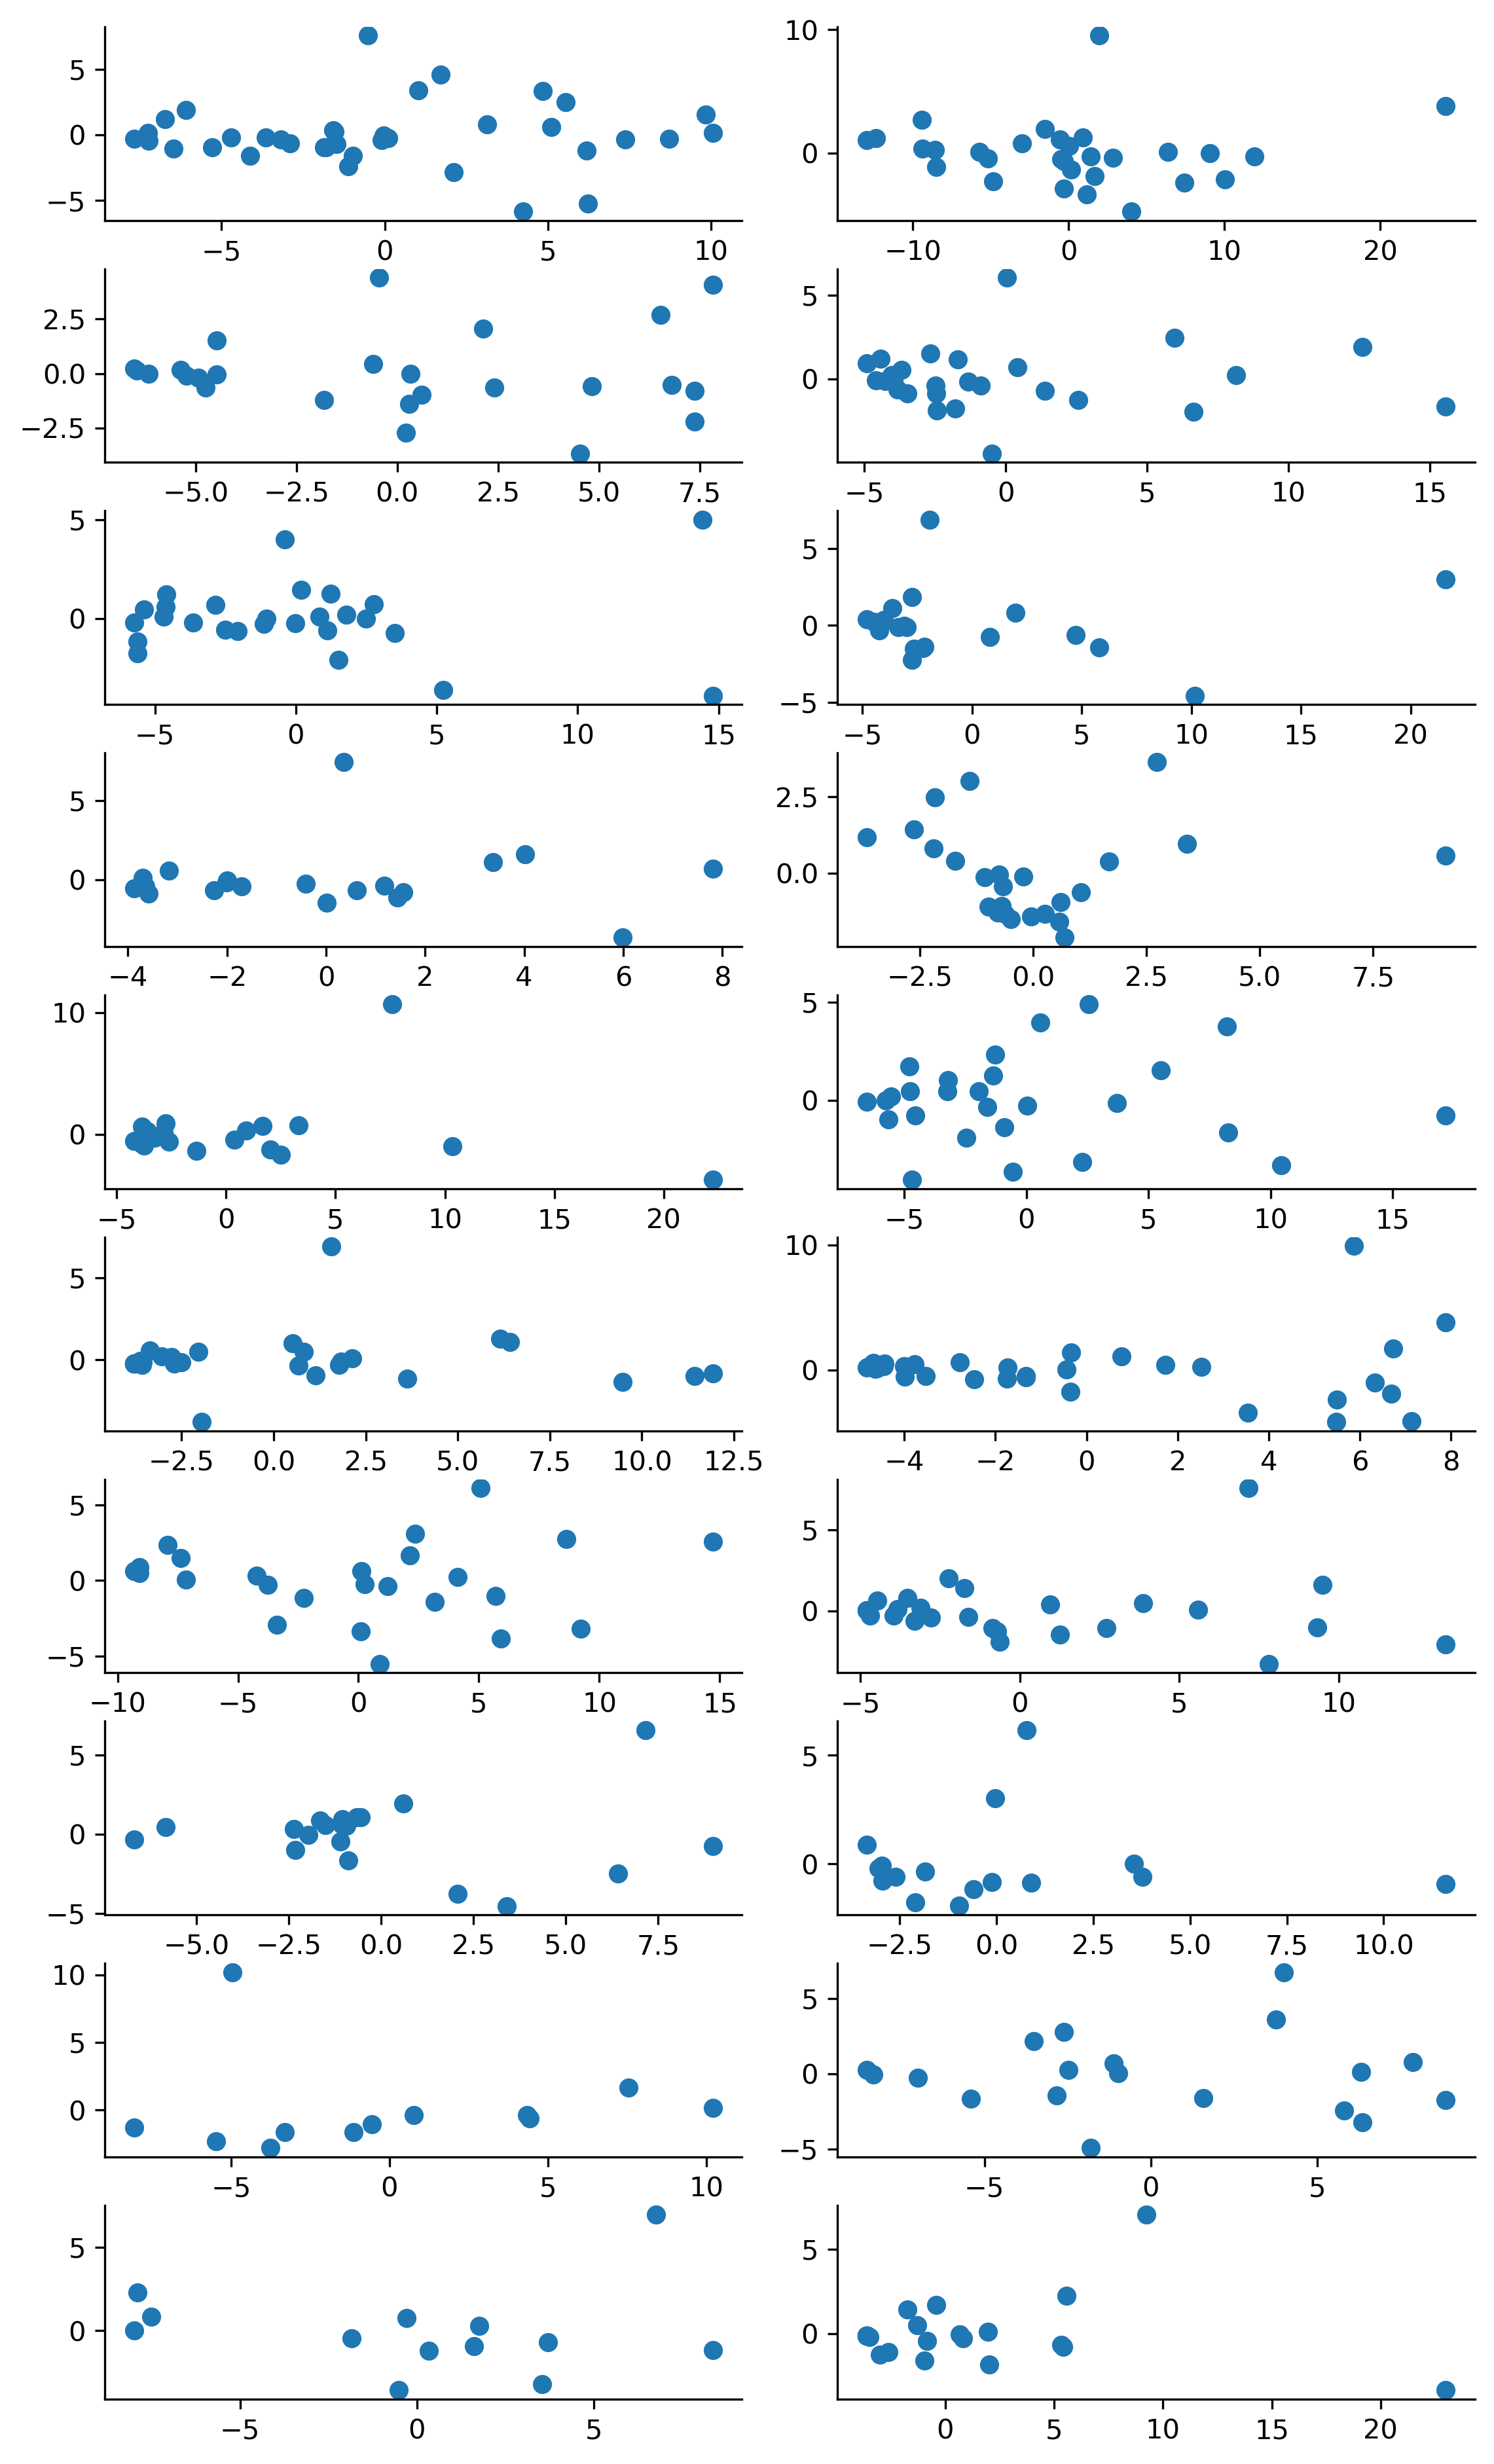

In [48]:
#Run 20 at a time to check all locations for some clustering of responses.
fig=plt.figure(figsize=(9, 16), dpi= 300)
fig.subplots_adjust(hspace=0.25, wspace=0.15)

#For the Go by twenty now.
for i in range(201, 221):
    figureIndex=i-200
    ax = fig.add_subplot(10, 2, figureIndex)
    
    #Run PCA and plot the responses using PCA1 and PCA2.
    #get the data for the specified location
    TestLocationData=data1.loc[data1['LocationCode'] == TestLocationCodes[i]]
    #Get only the Answers
    TestLocationAnswers=TestLocationData.iloc[:,1:61]

    #Run PCA to reduce the features to the top 2
    
    #Chose 2 components for now 
    pcaL=PCA(n_components=2)
    pcaL.fit(TestLocationAnswers)


    #trasform the Data
    DataArrayPCAL=pcaL.transform(TestLocationAnswers)

    #Plot the individual answers on PCA axis to see if there are any clustering of the responses.
    ax.scatter(DataArrayPCAL[:,0],DataArrayPCAL[:,1])
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

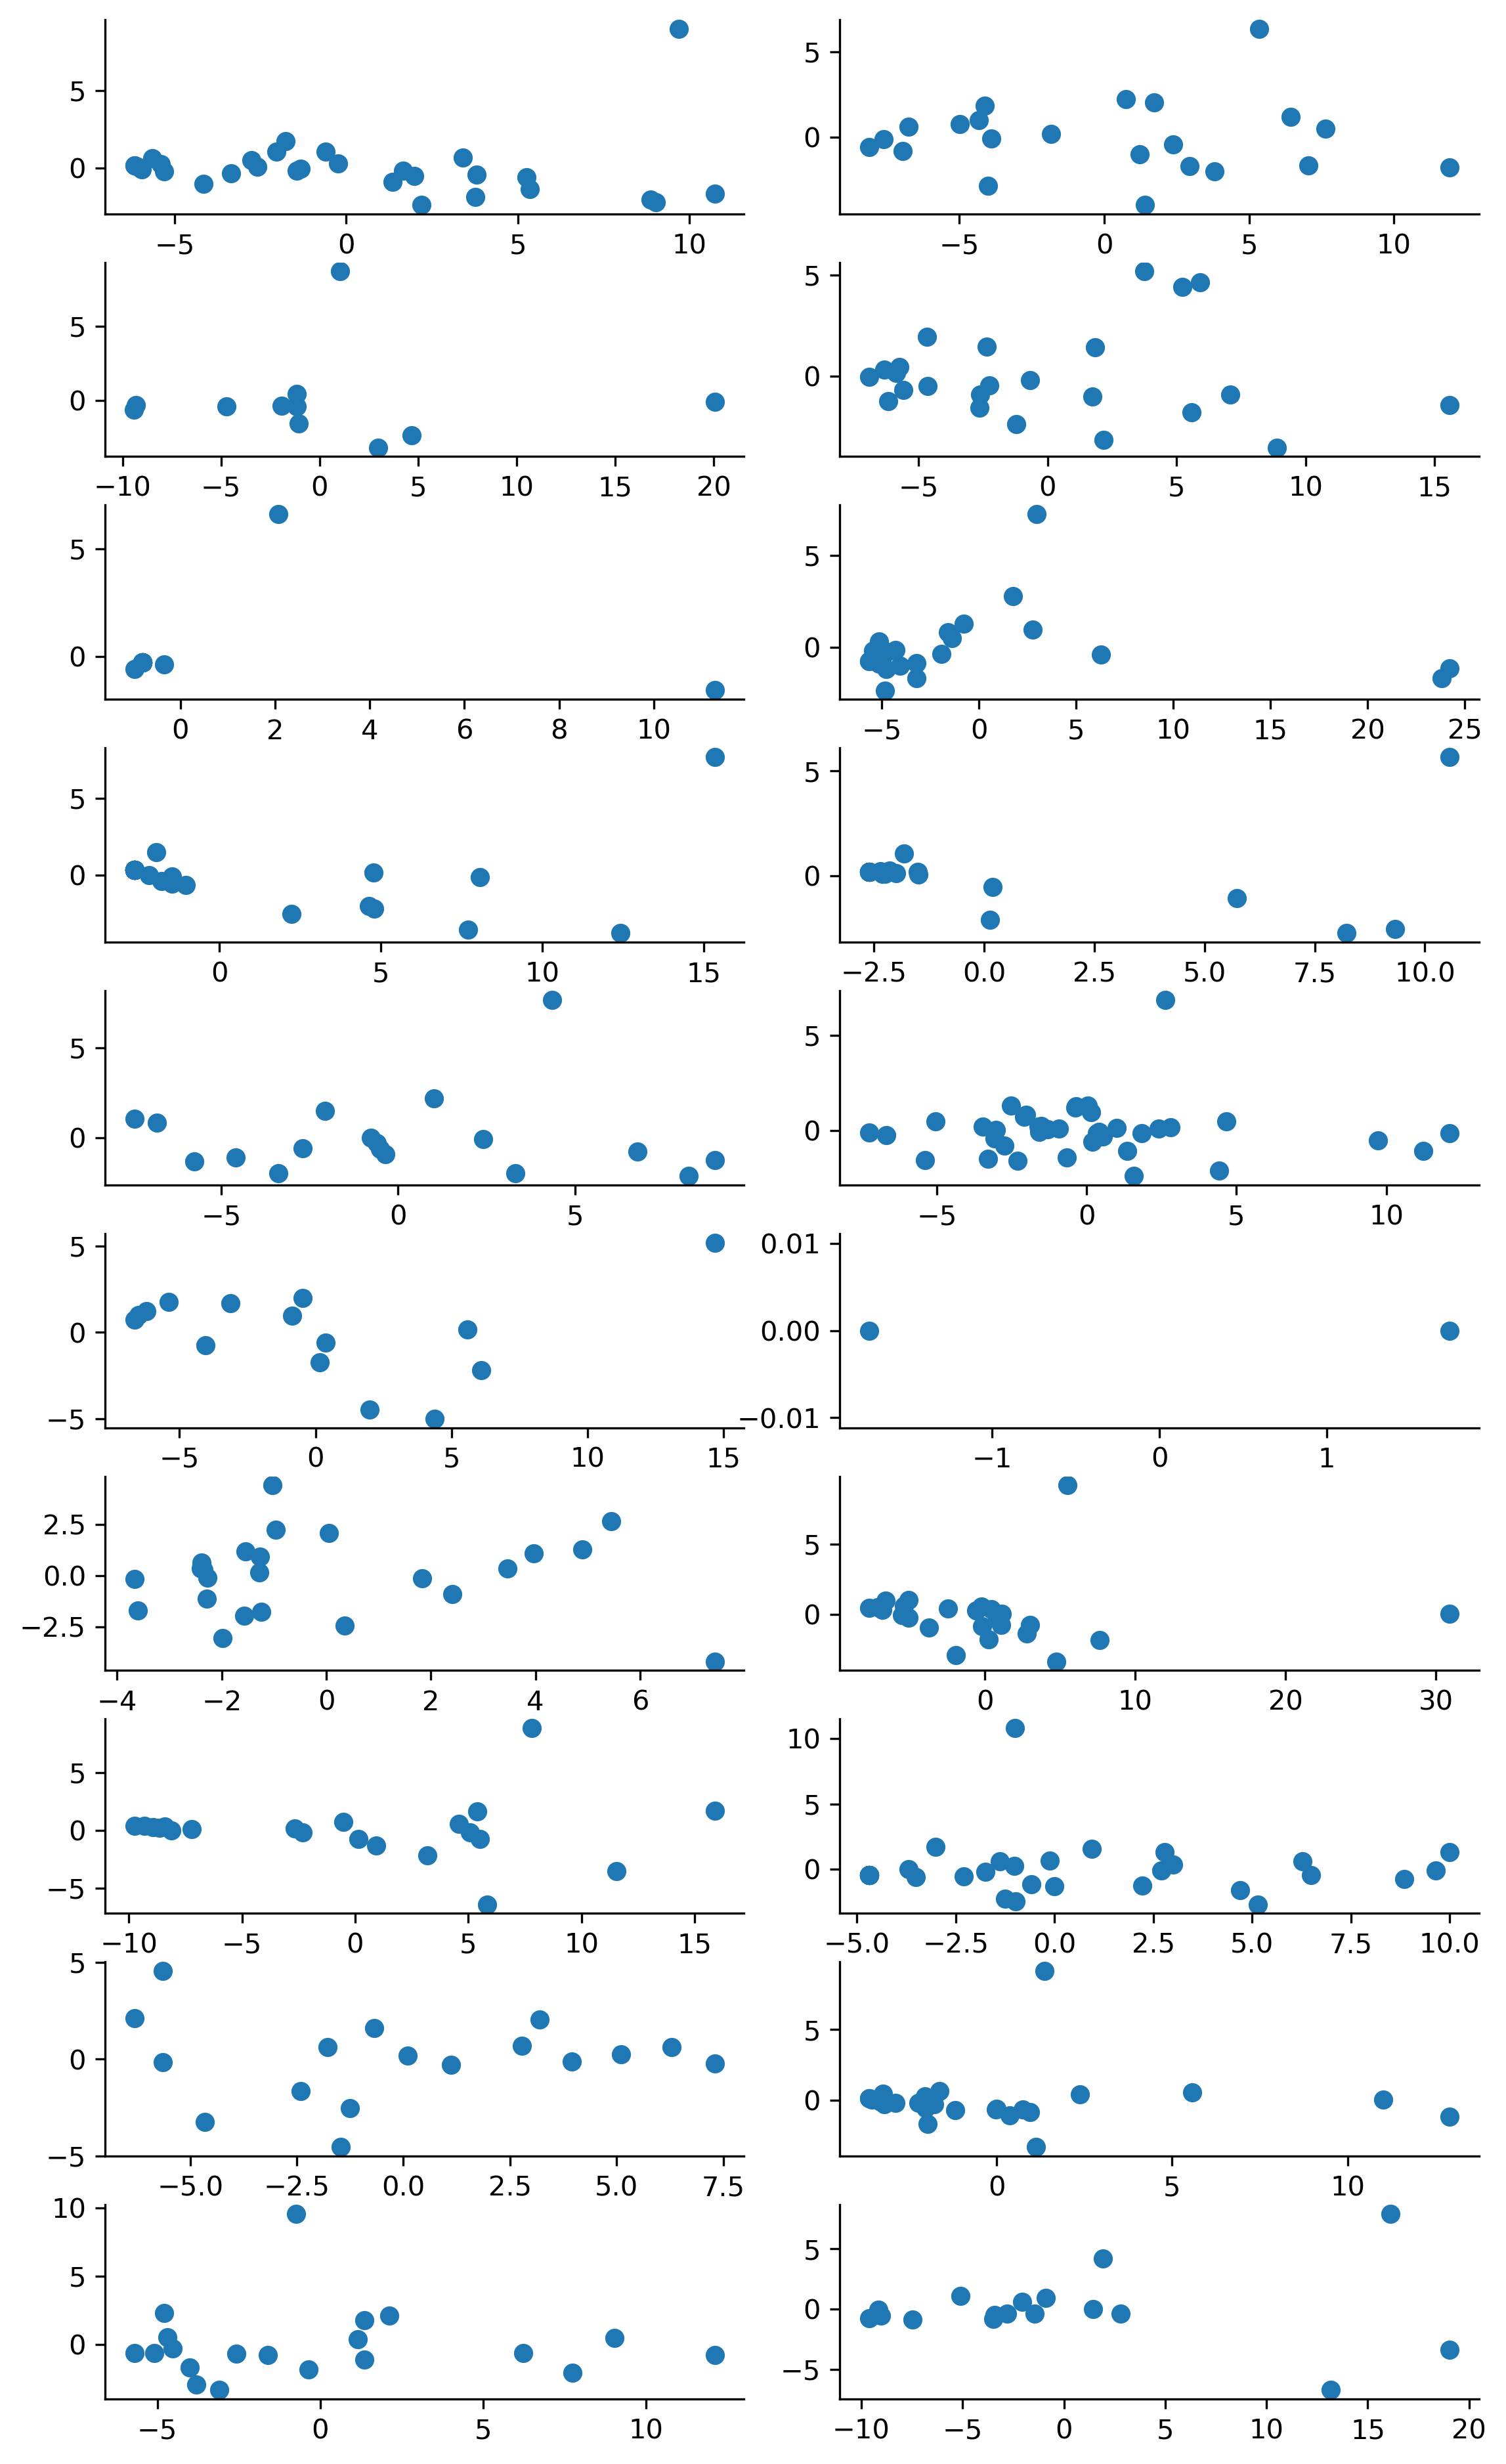

In [49]:
#Run 20 at a time to check all locations for some clustering of responses.
fig=plt.figure(figsize=(9, 16), dpi= 300)
fig.subplots_adjust(hspace=0.25, wspace=0.15)

#For the Go by twenty now.
for i in range(221, 241):
    figureIndex=i-220
    ax = fig.add_subplot(10, 2, figureIndex)
    
    #Run PCA and plot the responses using PCA1 and PCA2.
    #get the data for the specified location
    TestLocationData=data1.loc[data1['LocationCode'] == TestLocationCodes[i]]
    #Get only the Answers
    TestLocationAnswers=TestLocationData.iloc[:,1:61]

    #Run PCA to reduce the features to the top 2
    
    #Chose 2 components for now 
    pcaL=PCA(n_components=2)
    pcaL.fit(TestLocationAnswers)


    #trasform the Data
    DataArrayPCAL=pcaL.transform(TestLocationAnswers)

    #Plot the individual answers on PCA axis to see if there are any clustering of the responses.
    ax.scatter(DataArrayPCAL[:,0],DataArrayPCAL[:,1])
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

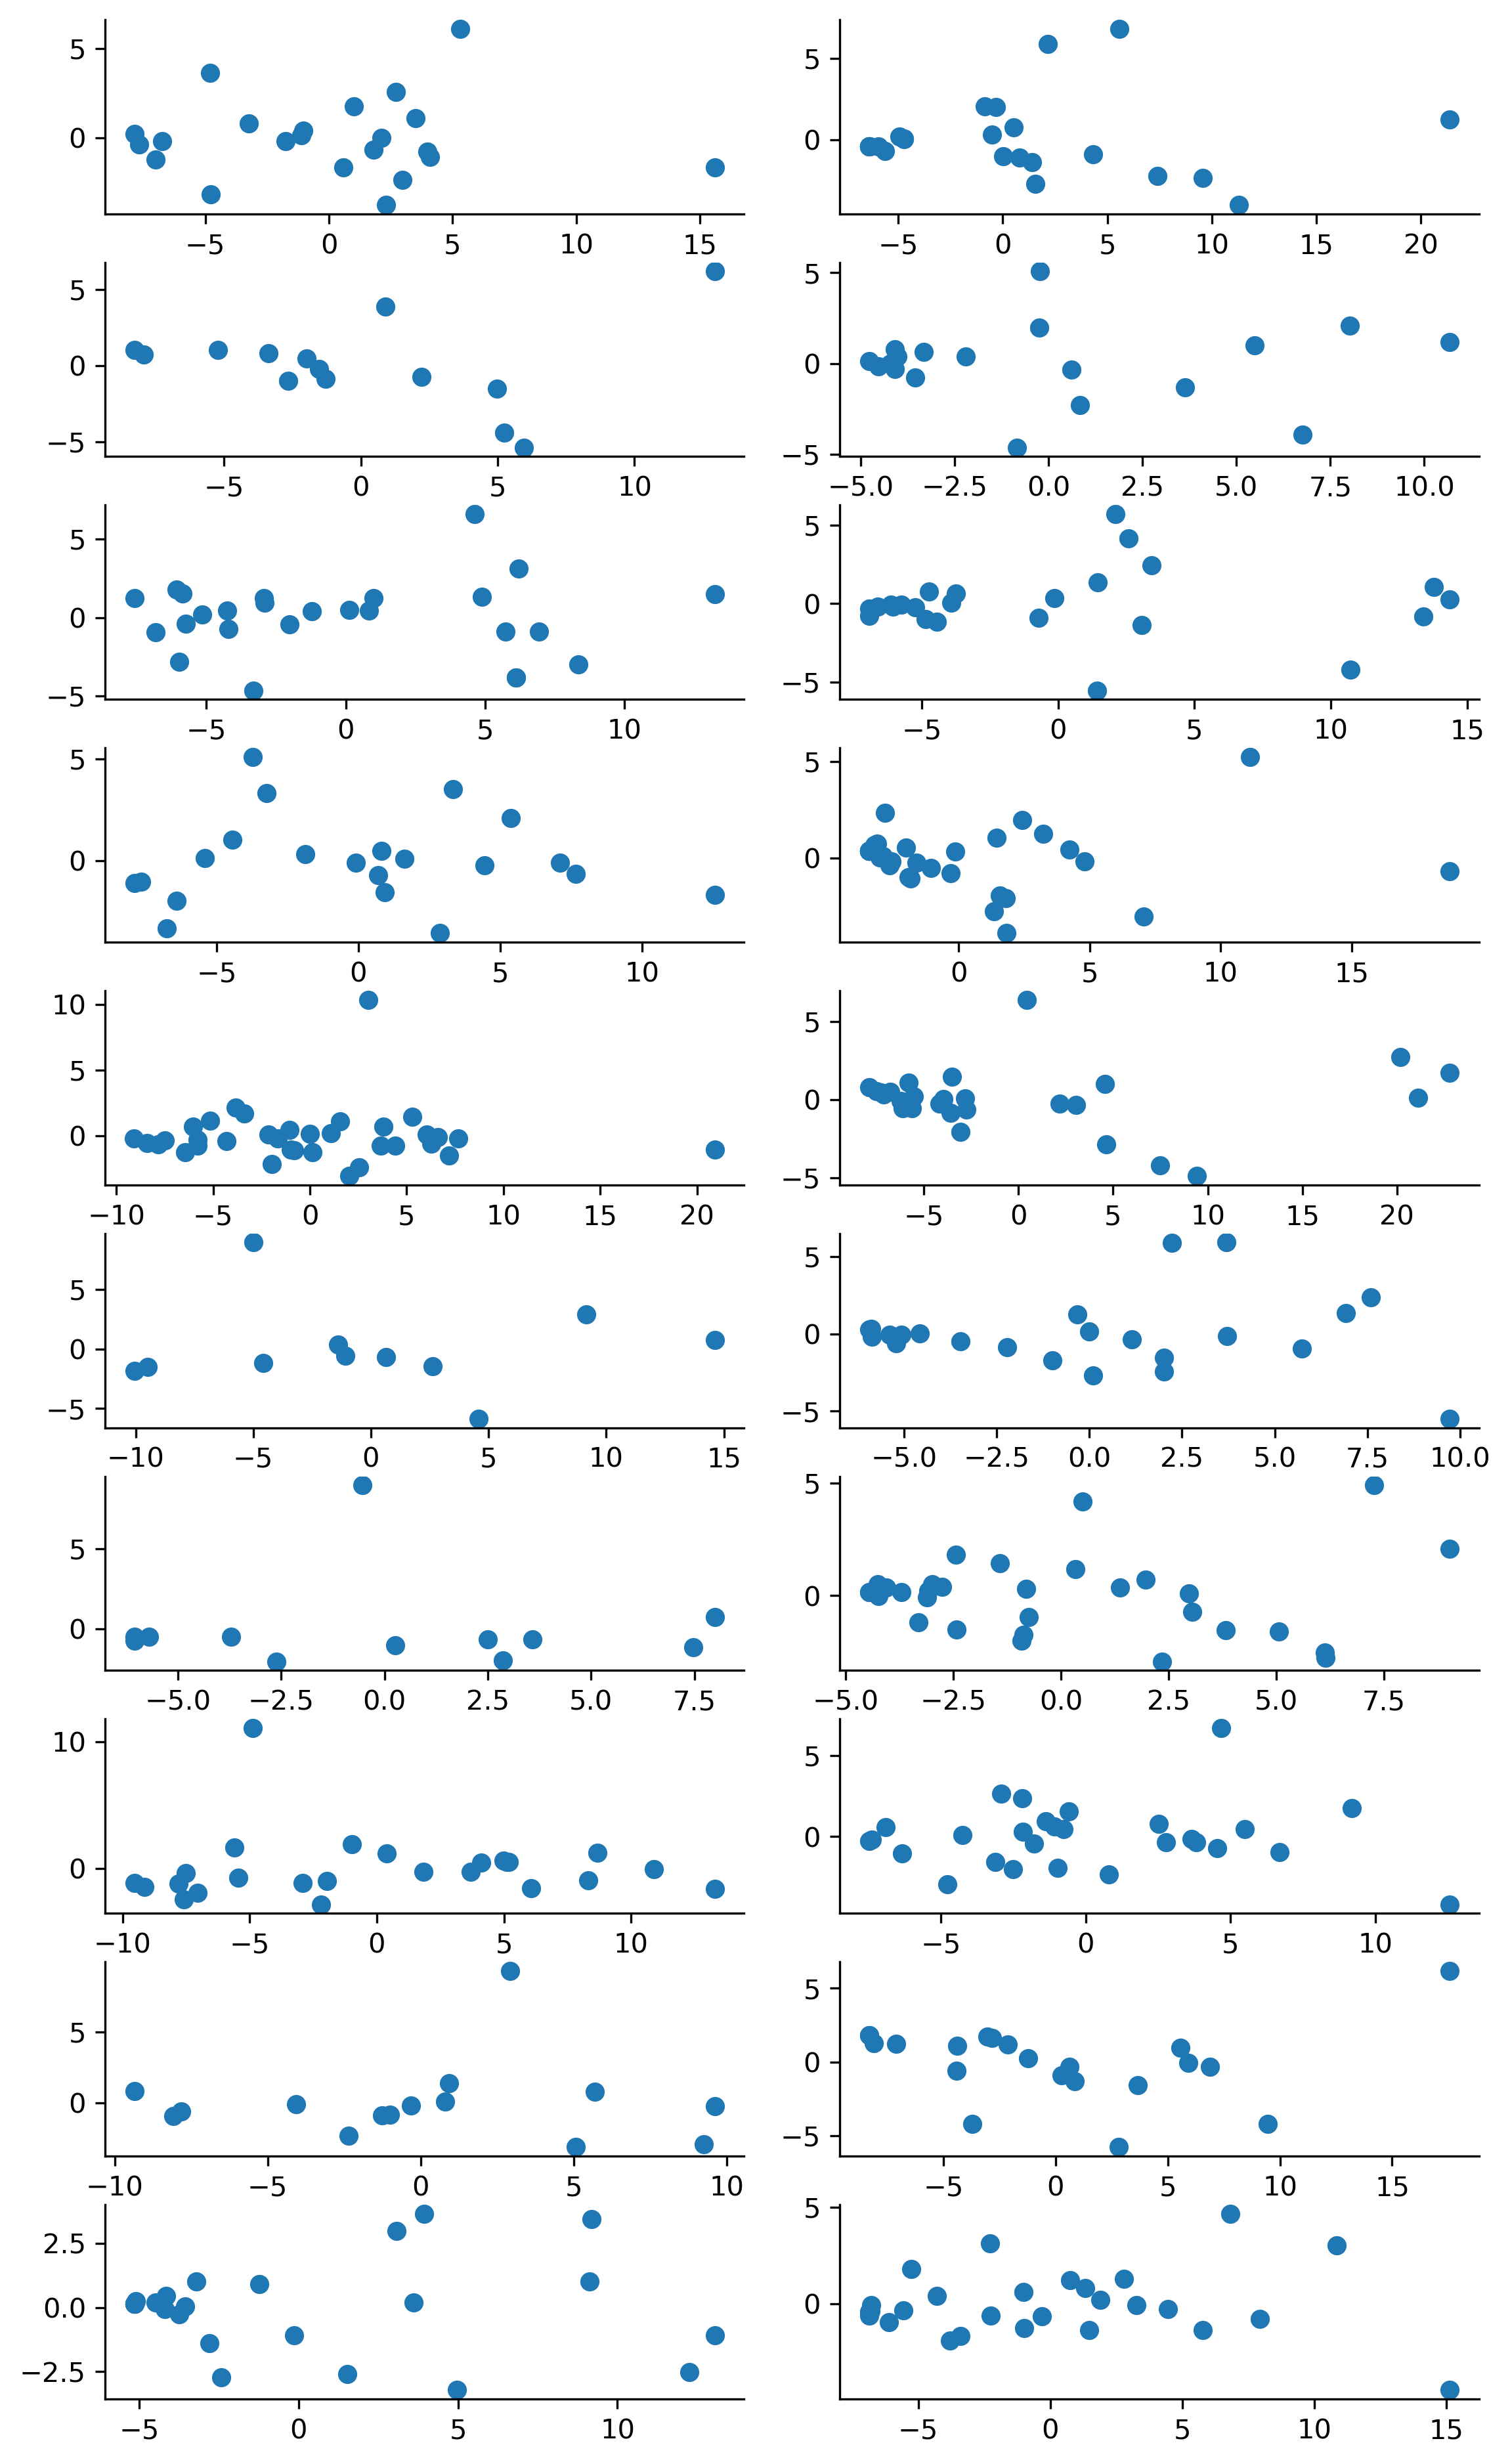

In [50]:
#Run 20 at a time to check all locations for some clustering of responses.
fig=plt.figure(figsize=(9, 16), dpi= 300)
fig.subplots_adjust(hspace=0.25, wspace=0.15)

#For the Go by twenty now.
for i in range(241, 261):
    figureIndex=i-240
    ax = fig.add_subplot(10, 2, figureIndex)
    
    #Run PCA and plot the responses using PCA1 and PCA2.
    #get the data for the specified location
    TestLocationData=data1.loc[data1['LocationCode'] == TestLocationCodes[i]]
    #Get only the Answers
    TestLocationAnswers=TestLocationData.iloc[:,1:61]

    #Run PCA to reduce the features to the top 2
    
    #Chose 2 components for now 
    pcaL=PCA(n_components=2)
    pcaL.fit(TestLocationAnswers)


    #trasform the Data
    DataArrayPCAL=pcaL.transform(TestLocationAnswers)

    #Plot the individual answers on PCA axis to see if there are any clustering of the responses.
    ax.scatter(DataArrayPCAL[:,0],DataArrayPCAL[:,1])
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

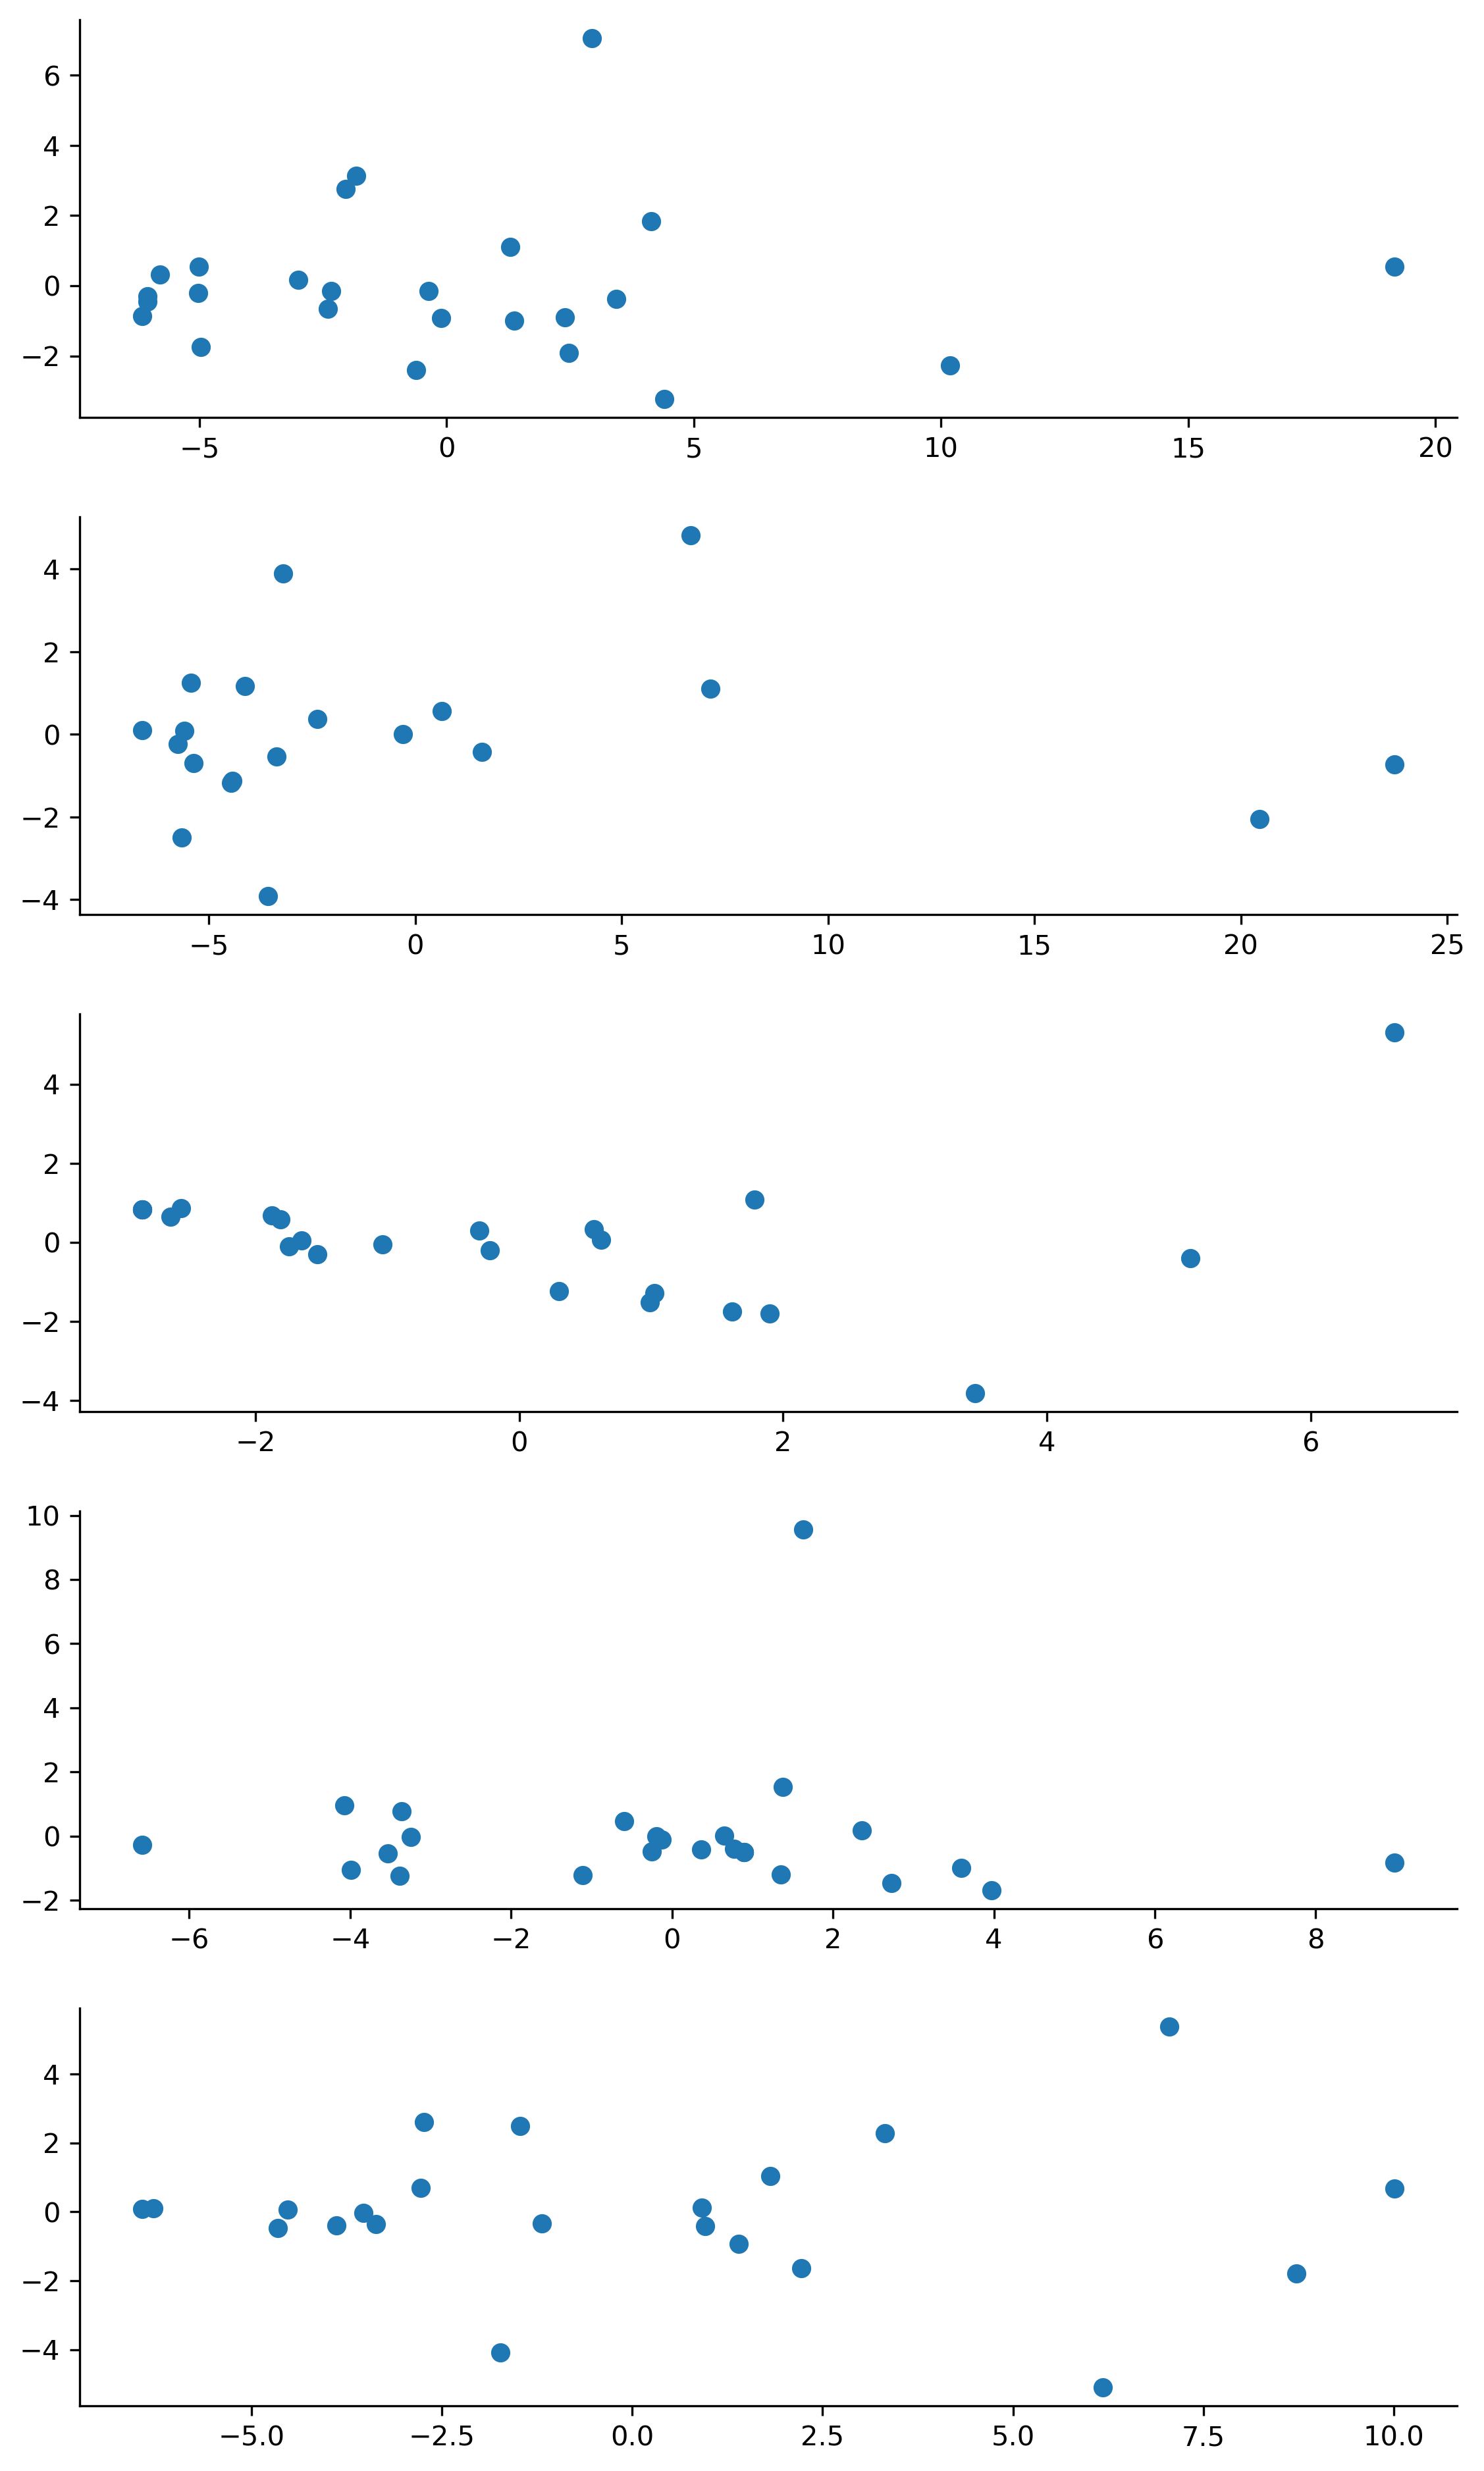

In [52]:
#Run 20 at a time to check all locations for some clustering of responses.
fig=plt.figure(figsize=(9, 16), dpi= 300)
fig.subplots_adjust(hspace=0.25, wspace=0.15)

#For the final 6.
for i in range(261, 266):
    figureIndex=i-260
    ax = fig.add_subplot(5, 1, figureIndex)
    
    #Run PCA and plot the responses using PCA1 and PCA2.
    #get the data for the specified location
    TestLocationData=data1.loc[data1['LocationCode'] == TestLocationCodes[i]]
    #Get only the Answers
    TestLocationAnswers=TestLocationData.iloc[:,1:61]

    #Run PCA to reduce the features to the top 2
    
    #Chose 2 components for now 
    pcaL=PCA(n_components=2)
    pcaL.fit(TestLocationAnswers)


    #trasform the Data
    DataArrayPCAL=pcaL.transform(TestLocationAnswers)

    #Plot the individual answers on PCA axis to see if there are any clustering of the responses.
    ax.scatter(DataArrayPCAL[:,0],DataArrayPCAL[:,1])
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')